In [1]:
import pandas as pd
import numpy as np
import os
import sys
import importlib
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from utils import *
from tqdm import tqdm

import pymc as pm

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

['HCT116', 'PC3', 'MP2', 'MCF7', 'K562', 'Colo320', 'H23', 'A549', 'H9']


# Matt's Data

In [ ]:
Matt_OUTPUT_DIR = './Matt_5UTR_data/'
os.makedirs(Matt_OUTPUT_DIR, exist_ok=True)

In [2]:
matt_data = pd.read_csv("./SourceData/UTR5_sequence_counts_05_23_23.tsv", sep="\t", index_col=0, header=[0, 1, 2])
matt_data.index.name = "seq"
matt_data.columns.names = ["cell_type", "replicate", "bin"]
matt_data

cell_type                                             c1                    \
replicate                                              1                     
bin                                                    1     2     3     4   
seq                                                                          
ATTGCTGCAGACGCTCACCCCAGACACTCACTGCACCGGAGTGAGCGCGA   396   228   349   344   
ATAATCAAGGAAACCTTTTCCGGGTGGGGATCTCTGAAATTACTCAGATA     0     0     1     7   
ACAGTGCTGTGCCAAAAACCTGTGGATTTTCTCTACAAAAATTATTGAGC   117   156    75    54   
ATTTTCTCTACAAAAATTATTGAGCAACCCTAATTAACCTGATTTTTTGC     0     0     1     0   
GGGACCAGATGGATTGTAGGGAGTAGGGTACAATACAGTCTGTTCTCCTC   108    33    74     8   
...                                                  ...   ...   ...   ...   
CGGCTGCGGCTGCGGCTGCGGCTGCTACTGCTACGCTCCTAGCTTGAGGG  1260   565   858   725   
CCTGGAGCCTCCGCGCCGGCTCAGCCTGGGGGCGGGCTCCGGTCCGGCCC  1731  1347  1395  1070   
GCAGAGTCTGCGGACCCGGCGCCGAGGCGGCCACCCGAGACGCGGCGCGC  1181   686  1045  1225   
CCGTCGTCTCCTCCGCGTCCCCGCCCGCCAGCTGCTGTCGGAGGTTGACA   855   682   831   914   
AGTGTAACATGGACAATTAACAGTGATGACAGATAAATACAGACGCATGG    34    14    10     2   

cell_type                                                                  \
replicate                                              2                    
bin                                                    1     2     3    4   
seq                                                                         
ATTGCTGCAGACGCTCACCCCAGACACTCACTGCACCGGAGTGAGCGCGA   280   684   569  226   
ATAATCAAGGAAACCTTTTCCGGGTGGGGATCTCTGAAATTACTCAGATA    13     6     7   22   
ACAGTGCTGTGCCAAAAACCTGTGGATTTTCTCTACAAAAATTATTGAGC   157   187    86   51   
ATTTTCTCTACAAAAATTATTGAGCAACCCTAATTAACCTGATTTTTTGC     0     6     1    3   
GGGACCAGATGGATTGTAGGGAGTAGGGTACAATACAGTCTGTTCTCCTC     4    56    21    4   
...                                                  ...   ...   ...  ...   
CGGCTGCGGCTGCGGCTGCGGCTGCTACTGCTACGCTCCTAGCTTGAGGG   752  1379  1101  412   
CCTGGAGCCTCCGCGCCGGCTCAGCCTGGGGGCGGGCTCCGGTCCGGCCC  1089  2501  1493  955   
GCAGAGTCTGCGGACCCGGCGCCGAGGCGGCCACCCGAGACGCGGCGCGC   776  1634  1474  904   
CCGTCGTCTCCTCCGCGTCCCCGCCCGCCAGCTGCTGTCGGAGGTTGACA   962  1730   969  826   
AGTGTAACATGGACAATTAACAGTGATGACAGATAAATACAGACGCATGG     0    19     1    1   

cell_type                                            c17                    \
replicate                                              1                     
bin                                                    1     2     3     4   
seq                                                                          
ATTGCTGCAGACGCTCACCCCAGACACTCACTGCACCGGAGTGAGCGCGA   802   702  1007   847   
ATAATCAAGGAAACCTTTTCCGGGTGGGGATCTCTGAAATTACTCAGATA     0     0     0     0   
ACAGTGCTGTGCCAAAAACCTGTGGATTTTCTCTACAAAAATTATTGAGC    87   117    67    97   
ATTTTCTCTACAAAAATTATTGAGCAACCCTAATTAACCTGATTTTTTGC     0     2     0     0   
GGGACCAGATGGATTGTAGGGAGTAGGGTACAATACAGTCTGTTCTCCTC    75   125   138    59   
...                                                  ...   ...   ...   ...   
CGGCTGCGGCTGCGGCTGCGGCTGCTACTGCTACGCTCCTAGCTTGAGGG  1334  2541  3650  2478   
CCTGGAGCCTCCGCGCCGGCTCAGCCTGGGGGCGGGCTCCGGTCCGGCCC  2774  3265  4007  2266   
GCAGAGTCTGCGGACCCGGCGCCGAGGCGGCCACCCGAGACGCGGCGCGC  2522  2720  3165  3554   
CCGTCGTCTCCTCCGCGTCCCCGCCCGCCAGCTGCTGTCGGAGGTTGACA  3432  3670  2210  1283   
AGTGTAACATGGACAATTAACAGTGATGACAGATAAATACAGACGCATGG     0     0     0     0   

cell_type                                                                     \
replicate                                               2                      
bin                                                     1      2     3     4   
seq                                                                            
ATTGCTGCAGACGCTCACCCCAGACACTCACTGCACCGGAGTGAGCGCGA   2285   5995  1287  1090   
ATAATCAAGGAAACCTTTTCCGGGTGGGGATCTCTGAAATTACTCAGATA      0      0     0     1   
ACAGTGCTGTGCCAAAAACCTG

In [3]:
matt_results = create_dataframes_from_multiindex(matt_data)
matt_cell_lines = list(matt_results.keys())
matt_cell_lines

['c1_Rep1',
 'c1_Rep2',
 'c17_Rep1',
 'c17_Rep2',
 'c2_Rep1',
 'c2_Rep2',
 'c4_Rep1',
 'c4_Rep2',
 'c6_Rep1',
 'c6_Rep2']

  0%|                                                                                                                | 0/10 [00:00<?, ?it/s]/home/yanyichu/1_UTR_Cell_Type/UTR_celltype_github/Data_Processing/utils.py:54: RuntimeWarning: Mean of empty slice
  geometric_means = np.exp(np.nanmean(np.log(df_temp), axis=1))



Processing c1_Rep1
c1_Rep1 initial shape: (30000, 4)
c1_Rep1: Removed 0 rows with missing values (0.0% of data)
c1_Rep1 shape after filtering missing values: (30000, 4)
c1_Rep1 size factors: [1.48848078 1.         1.25358214 1.25570876]
Plot saved to: ./Matt_5UTR_data//c1_Rep1_median_norm_counts.png


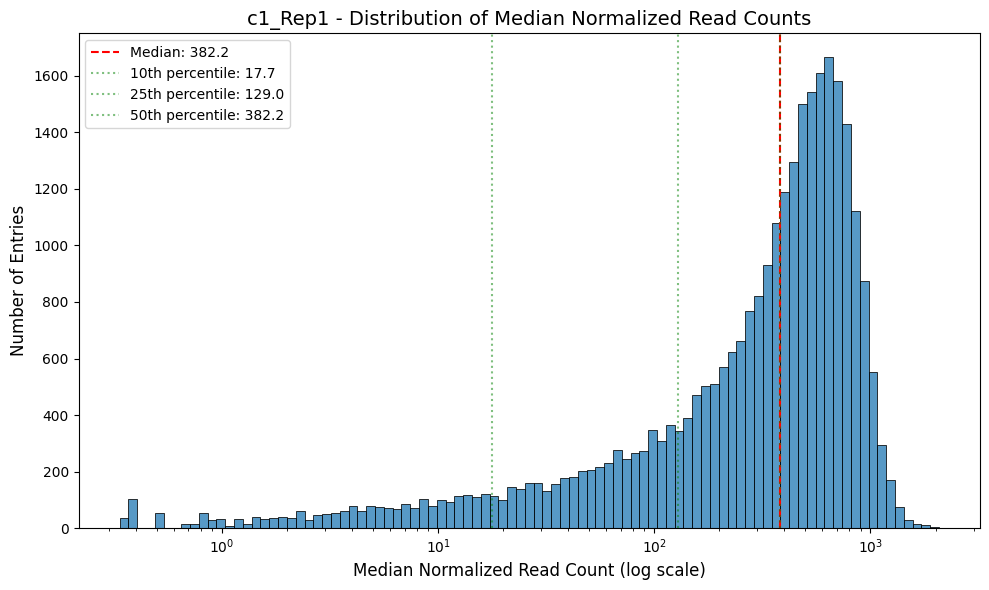


Suggested thresholds for c1_Rep1:
- Median: 382.2
- 10th percentile: 17.7
- 25th percentile: 129.0
- 50th percentile: 382.2
c1_Rep1: Removed 6585 rows below threshold 100 (21.9% of data)
Remaining entries: 23415
c1_Rep1 shape after all filtering: (23415, 4)
c1_Rep1 results shape: (23415, 4)


 10%|██████████▍                                                                                             | 1/10 [00:28<04:13, 28.13s/it]

Results saved to ./Matt_5UTR_data//c1_Rep1_5UTR_analysis.csv
Successfully processed c1_Rep1

Processing c1_Rep2
c1_Rep2 initial shape: (30000, 4)
c1_Rep2: Removed 0 rows with missing values (0.0% of data)
c1_Rep2 shape after filtering missing values: (30000, 4)
c1_Rep2 size factors: [1.1461558  2.17815457 1.6083363  1.        ]


/home/yanyichu/1_UTR_Cell_Type/UTR_celltype_github/Data_Processing/utils.py:54: RuntimeWarning: Mean of empty slice
  geometric_means = np.exp(np.nanmean(np.log(df_temp), axis=1))


Plot saved to: ./Matt_5UTR_data//c1_Rep2_median_norm_counts.png


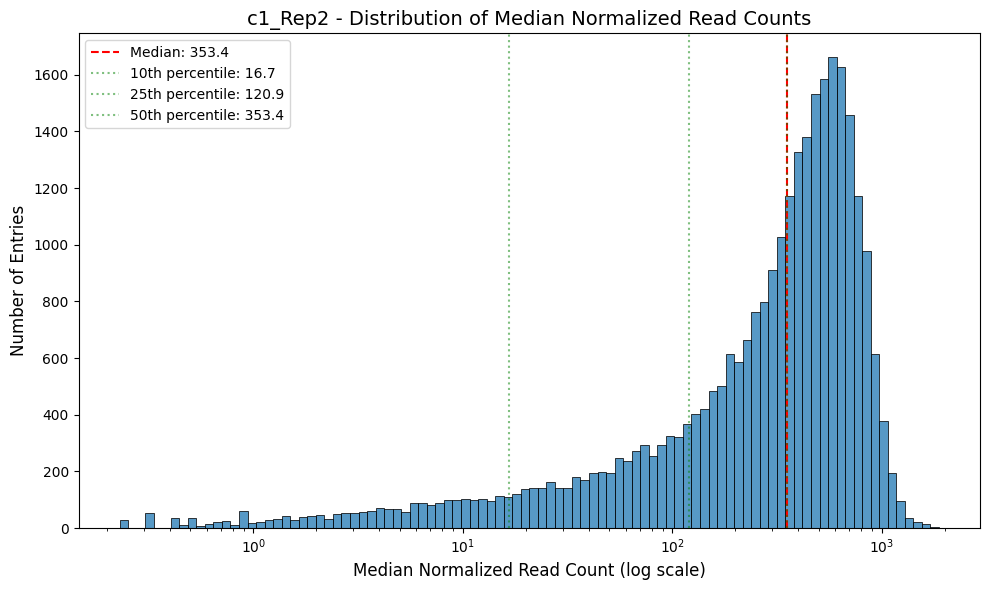


Suggested thresholds for c1_Rep2:
- Median: 353.4
- 10th percentile: 16.7
- 25th percentile: 120.9
- 50th percentile: 353.4
c1_Rep2: Removed 6798 rows below threshold 100 (22.7% of data)
Remaining entries: 23202
c1_Rep2 shape after all filtering: (23202, 4)
c1_Rep2 results shape: (23202, 4)


 20%|████████████████████▊                                                                                   | 2/10 [00:55<03:43, 27.90s/it]

Results saved to ./Matt_5UTR_data//c1_Rep2_5UTR_analysis.csv
Successfully processed c1_Rep2

Processing c17_Rep1
c17_Rep1 initial shape: (30000, 4)
c17_Rep1: Removed 0 rows with missing values (0.0% of data)
c17_Rep1 shape after filtering missing values: (30000, 4)
c17_Rep1 size factors: [1.         1.20618892 1.58658834 1.38694601]


/home/yanyichu/1_UTR_Cell_Type/UTR_celltype_github/Data_Processing/utils.py:54: RuntimeWarning: Mean of empty slice
  geometric_means = np.exp(np.nanmean(np.log(df_temp), axis=1))


Plot saved to: ./Matt_5UTR_data//c17_Rep1_median_norm_counts.png


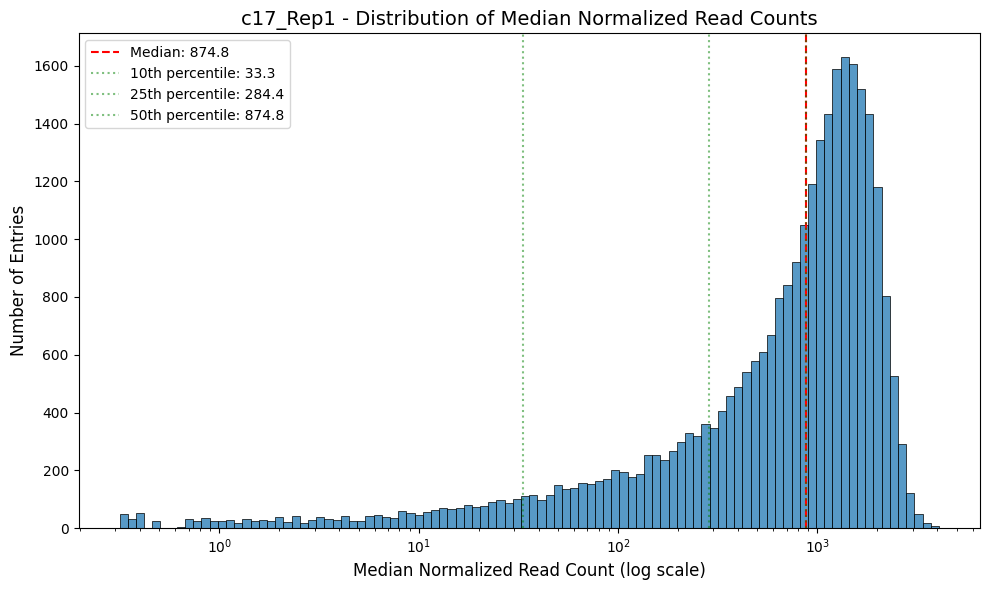


Suggested thresholds for c17_Rep1:
- Median: 874.8
- 10th percentile: 33.3
- 25th percentile: 284.4
- 50th percentile: 874.8
c17_Rep1: Removed 4640 rows below threshold 100 (15.5% of data)
Remaining entries: 25360
c17_Rep1 shape after all filtering: (25360, 4)
c17_Rep1 results shape: (25360, 4)


 30%|███████████████████████████████▏                                                                        | 3/10 [01:26<03:23, 29.08s/it]

Results saved to ./Matt_5UTR_data//c17_Rep1_5UTR_analysis.csv
Successfully processed c17_Rep1

Processing c17_Rep2
c17_Rep2 initial shape: (30000, 4)
c17_Rep2: Removed 0 rows with missing values (0.0% of data)
c17_Rep2 shape after filtering missing values: (30000, 4)
c17_Rep2 size factors: [2.04140862 5.04096505 1.22969342 1.        ]


/home/yanyichu/1_UTR_Cell_Type/UTR_celltype_github/Data_Processing/utils.py:54: RuntimeWarning: Mean of empty slice
  geometric_means = np.exp(np.nanmean(np.log(df_temp), axis=1))


Plot saved to: ./Matt_5UTR_data//c17_Rep2_median_norm_counts.png


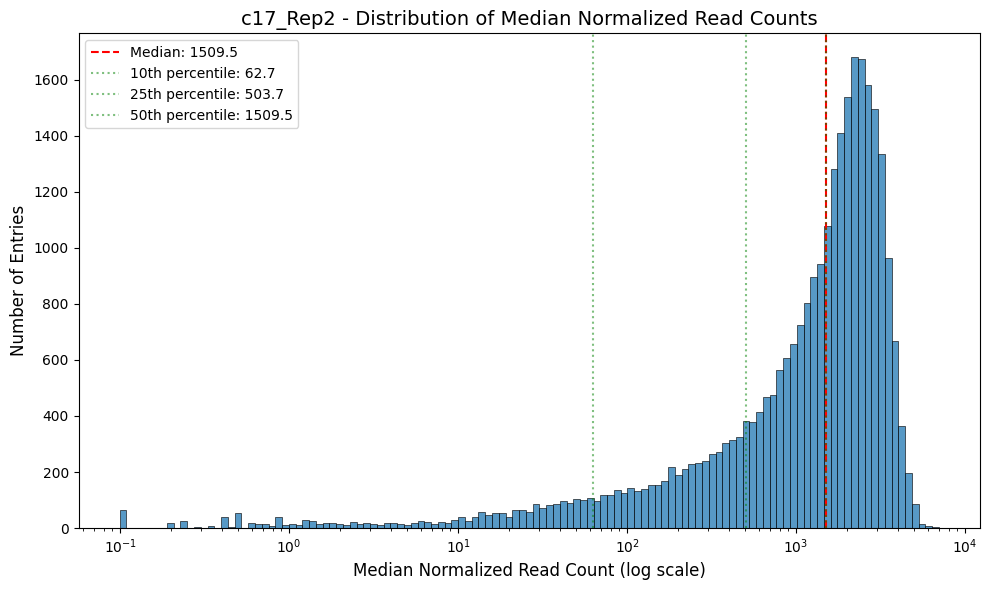


Suggested thresholds for c17_Rep2:
- Median: 1509.5
- 10th percentile: 62.7
- 25th percentile: 503.7
- 50th percentile: 1509.5
c17_Rep2: Removed 3613 rows below threshold 100 (12.0% of data)
Remaining entries: 26387
c17_Rep2 shape after all filtering: (26387, 4)
c17_Rep2 results shape: (26387, 4)


 40%|█████████████████████████████████████████▌                                                              | 4/10 [01:58<03:00, 30.13s/it]

Results saved to ./Matt_5UTR_data//c17_Rep2_5UTR_analysis.csv
Successfully processed c17_Rep2

Processing c2_Rep1
c2_Rep1 initial shape: (30000, 4)
c2_Rep1: Removed 0 rows with missing values (0.0% of data)
c2_Rep1 shape after filtering missing values: (30000, 4)
c2_Rep1 size factors: [1.         1.43834456 1.74410335 1.88630111]


/home/yanyichu/1_UTR_Cell_Type/UTR_celltype_github/Data_Processing/utils.py:54: RuntimeWarning: Mean of empty slice
  geometric_means = np.exp(np.nanmean(np.log(df_temp), axis=1))


Plot saved to: ./Matt_5UTR_data//c2_Rep1_median_norm_counts.png


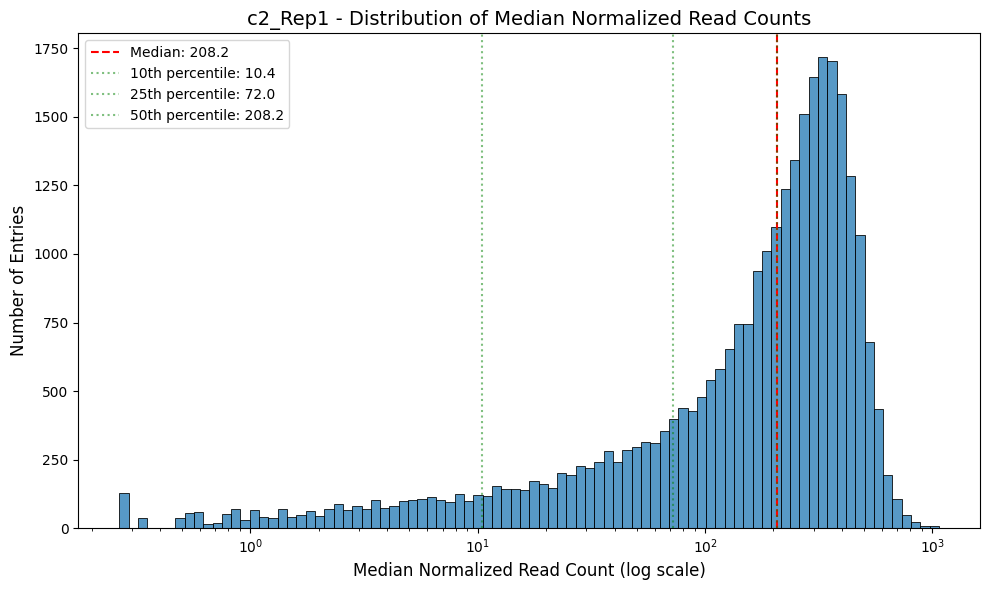


Suggested thresholds for c2_Rep1:
- Median: 208.2
- 10th percentile: 10.4
- 25th percentile: 72.0
- 50th percentile: 208.2
c2_Rep1: Removed 9048 rows below threshold 100 (30.2% of data)
Remaining entries: 20952
c2_Rep1 shape after all filtering: (20952, 4)
c2_Rep1 results shape: (20952, 4)


 50%|████████████████████████████████████████████████████                                                    | 5/10 [02:22<02:21, 28.22s/it]

Results saved to ./Matt_5UTR_data//c2_Rep1_5UTR_analysis.csv
Successfully processed c2_Rep1

Processing c2_Rep2
c2_Rep2 initial shape: (30000, 4)
c2_Rep2: Removed 0 rows with missing values (0.0% of data)
c2_Rep2 shape after filtering missing values: (30000, 4)
c2_Rep2 size factors: [1.         1.21234332 1.80928634 2.46042863]


/home/yanyichu/1_UTR_Cell_Type/UTR_celltype_github/Data_Processing/utils.py:54: RuntimeWarning: Mean of empty slice
  geometric_means = np.exp(np.nanmean(np.log(df_temp), axis=1))


Plot saved to: ./Matt_5UTR_data//c2_Rep2_median_norm_counts.png


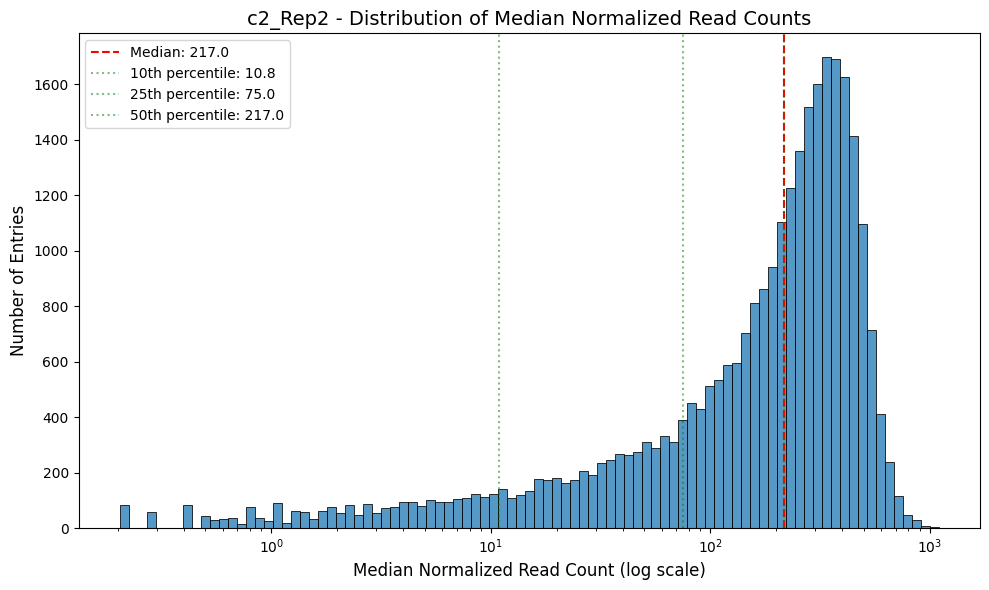


Suggested thresholds for c2_Rep2:
- Median: 217.0
- 10th percentile: 10.8
- 25th percentile: 75.0
- 50th percentile: 217.0
c2_Rep2: Removed 8855 rows below threshold 100 (29.5% of data)
Remaining entries: 21145
c2_Rep2 shape after all filtering: (21145, 4)
c2_Rep2 results shape: (21145, 4)


 60%|██████████████████████████████████████████████████████████████▍                                         | 6/10 [02:48<01:49, 27.40s/it]

Results saved to ./Matt_5UTR_data//c2_Rep2_5UTR_analysis.csv
Successfully processed c2_Rep2

Processing c4_Rep1
c4_Rep1 initial shape: (30000, 4)
c4_Rep1: Removed 0 rows with missing values (0.0% of data)
c4_Rep1 shape after filtering missing values: (30000, 4)
c4_Rep1 size factors: [1.20751636 1.08174996 1.         1.01031451]


/home/yanyichu/1_UTR_Cell_Type/UTR_celltype_github/Data_Processing/utils.py:54: RuntimeWarning: Mean of empty slice
  geometric_means = np.exp(np.nanmean(np.log(df_temp), axis=1))


Plot saved to: ./Matt_5UTR_data//c4_Rep1_median_norm_counts.png


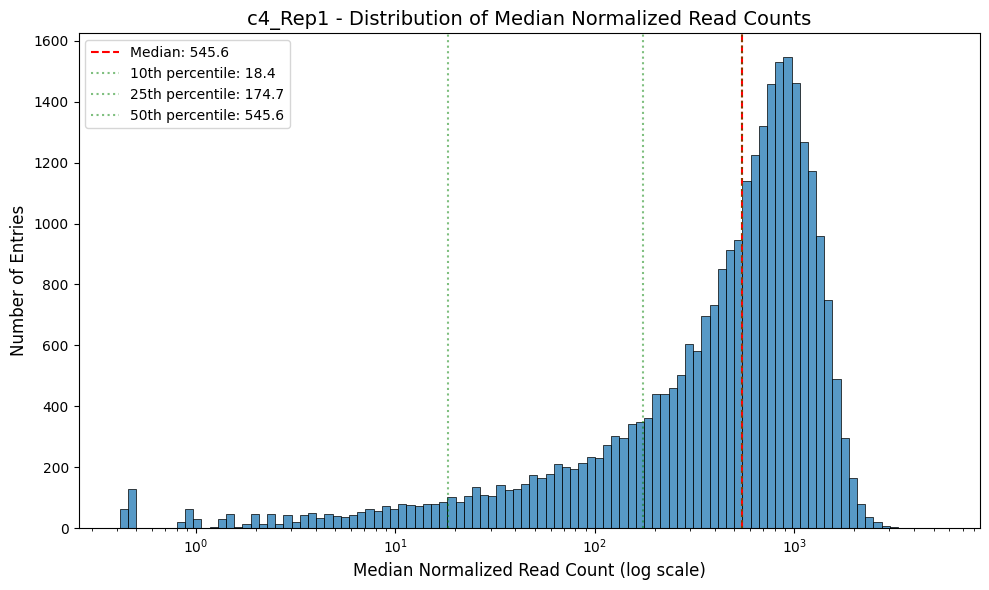


Suggested thresholds for c4_Rep1:
- Median: 545.6
- 10th percentile: 18.4
- 25th percentile: 174.7
- 50th percentile: 545.6
c4_Rep1: Removed 5750 rows below threshold 100 (19.2% of data)
Remaining entries: 24250
c4_Rep1 shape after all filtering: (24250, 4)
c4_Rep1 results shape: (24250, 4)


 70%|████████████████████████████████████████████████████████████████████████▊                               | 7/10 [03:17<01:23, 27.99s/it]

Results saved to ./Matt_5UTR_data//c4_Rep1_5UTR_analysis.csv
Successfully processed c4_Rep1

Processing c4_Rep2
c4_Rep2 initial shape: (30000, 4)
c4_Rep2: Removed 0 rows with missing values (0.0% of data)
c4_Rep2 shape after filtering missing values: (30000, 4)
c4_Rep2 size factors: [1.         1.29930476 1.28465509 1.3054625 ]


/home/yanyichu/1_UTR_Cell_Type/UTR_celltype_github/Data_Processing/utils.py:54: RuntimeWarning: Mean of empty slice
  geometric_means = np.exp(np.nanmean(np.log(df_temp), axis=1))


Plot saved to: ./Matt_5UTR_data//c4_Rep2_median_norm_counts.png


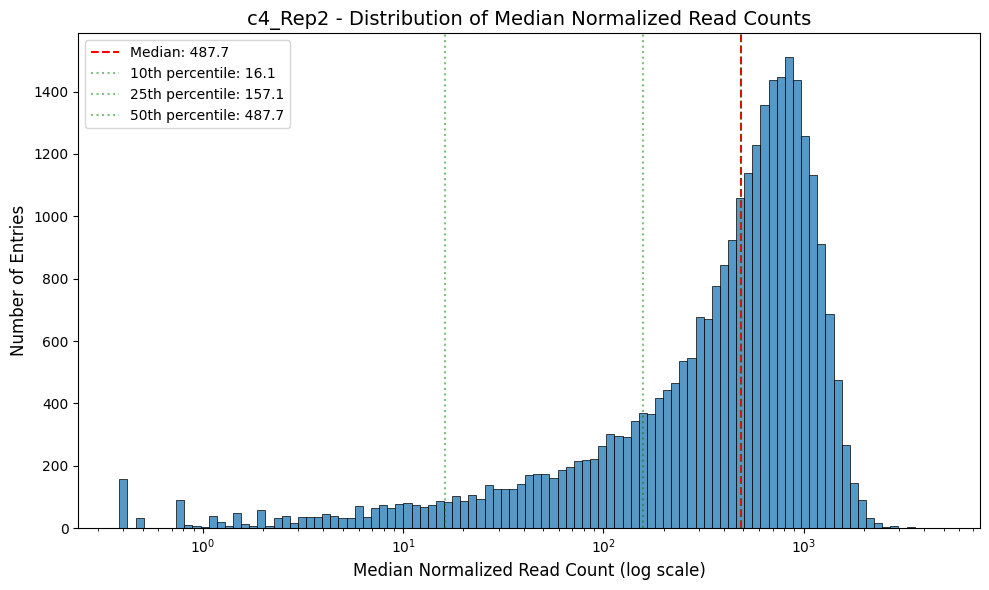


Suggested thresholds for c4_Rep2:
- Median: 487.7
- 10th percentile: 16.1
- 25th percentile: 157.1
- 50th percentile: 487.7
c4_Rep2: Removed 6006 rows below threshold 100 (20.0% of data)
Remaining entries: 23994
c4_Rep2 shape after all filtering: (23994, 4)
c4_Rep2 results shape: (23994, 4)


 80%|███████████████████████████████████████████████████████████████████████████████████▏                    | 8/10 [03:46<00:56, 28.19s/it]

Results saved to ./Matt_5UTR_data//c4_Rep2_5UTR_analysis.csv
Successfully processed c4_Rep2

Processing c6_Rep1
c6_Rep1 initial shape: (30000, 4)
c6_Rep1: Removed 0 rows with missing values (0.0% of data)
c6_Rep1 shape after filtering missing values: (30000, 4)
c6_Rep1 size factors: [2.12891268 1.12421821 1.3609471  1.        ]


/home/yanyichu/1_UTR_Cell_Type/UTR_celltype_github/Data_Processing/utils.py:54: RuntimeWarning: Mean of empty slice
  geometric_means = np.exp(np.nanmean(np.log(df_temp), axis=1))


Plot saved to: ./Matt_5UTR_data//c6_Rep1_median_norm_counts.png


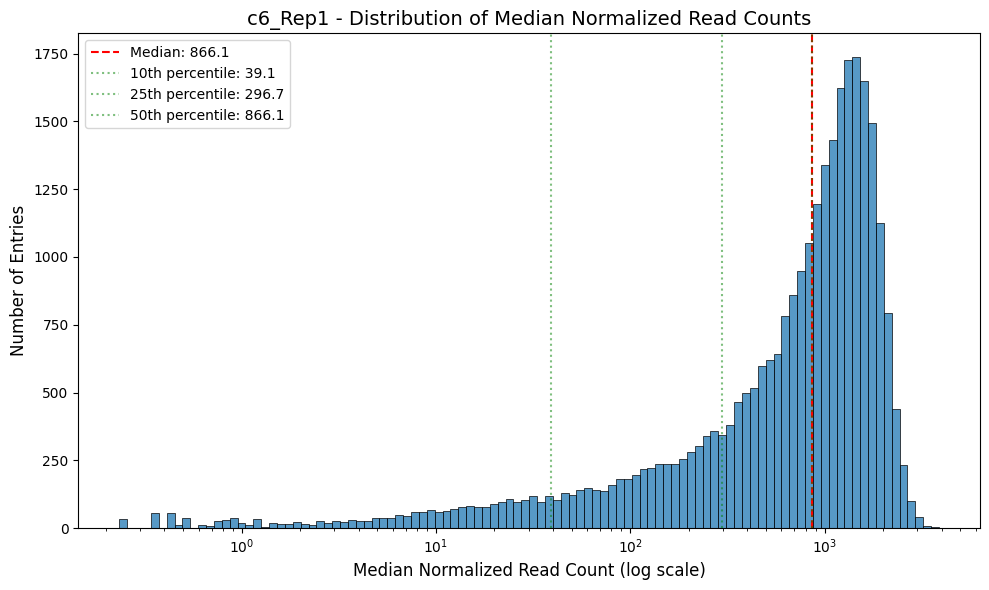


Suggested thresholds for c6_Rep1:
- Median: 866.1
- 10th percentile: 39.1
- 25th percentile: 296.7
- 50th percentile: 866.1
c6_Rep1: Removed 4442 rows below threshold 100 (14.8% of data)
Remaining entries: 25558
c6_Rep1 shape after all filtering: (25558, 4)
c6_Rep1 results shape: (25558, 4)


 90%|█████████████████████████████████████████████████████████████████████████████████████████████▌          | 9/10 [04:17<00:28, 28.91s/it]

Results saved to ./Matt_5UTR_data//c6_Rep1_5UTR_analysis.csv
Successfully processed c6_Rep1

Processing c6_Rep2
c6_Rep2 initial shape: (30000, 4)
c6_Rep2: Removed 0 rows with missing values (0.0% of data)
c6_Rep2 shape after filtering missing values: (30000, 4)
c6_Rep2 size factors: [1.         1.20563698 1.47956978 1.93048447]


/home/yanyichu/1_UTR_Cell_Type/UTR_celltype_github/Data_Processing/utils.py:54: RuntimeWarning: Mean of empty slice
  geometric_means = np.exp(np.nanmean(np.log(df_temp), axis=1))


Plot saved to: ./Matt_5UTR_data//c6_Rep2_median_norm_counts.png


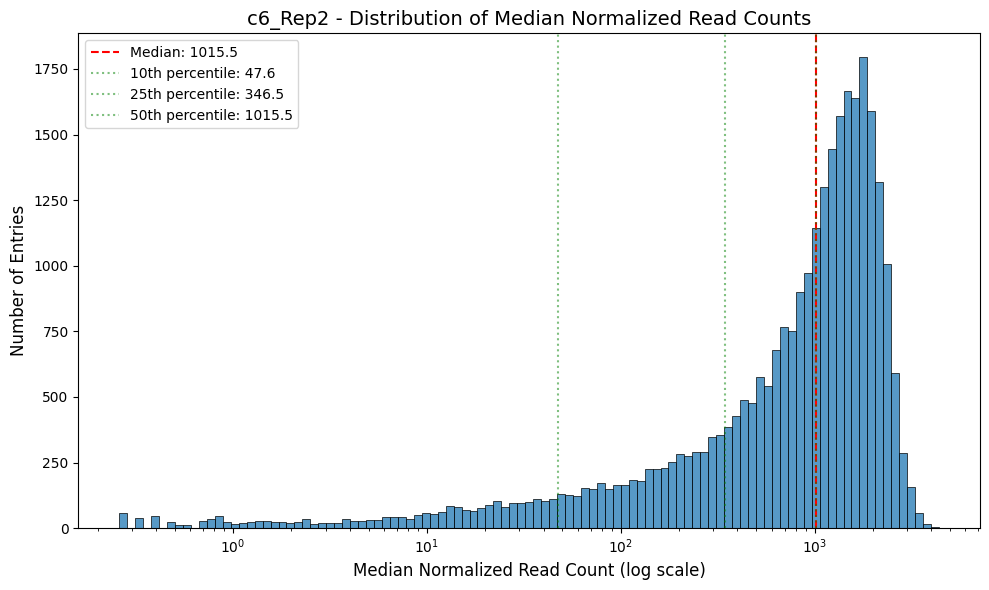


Suggested thresholds for c6_Rep2:
- Median: 1015.5
- 10th percentile: 47.6
- 25th percentile: 346.5
- 50th percentile: 1015.5
c6_Rep2: Removed 4151 rows below threshold 100 (13.8% of data)
Remaining entries: 25849
c6_Rep2 shape after all filtering: (25849, 4)
c6_Rep2 results shape: (25849, 4)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [04:48<00:00, 28.82s/it]

Results saved to ./Matt_5UTR_data//c6_Rep2_5UTR_analysis.csv
Successfully processed c6_Rep2

PROCESSING SUMMARY
Successfully processed 10 cell lines:
- c1_Rep1
- c1_Rep2
- c17_Rep1
- c17_Rep2
- c2_Rep1
- c2_Rep2
- c4_Rep1
- c4_Rep2
- c6_Rep1
- c6_Rep2


In [4]:
# Process each remaining cell line
all_results = dict()
for cell_line in tqdm(matt_cell_lines):

    counts_df = matt_results[cell_line]
    result = process_cell_line_matt(counts_df, cell_line,
                               output_dir = Matt_OUTPUT_DIR, 
                               utr_type = '3UTR', date_str = '030725')
    
    if result is not None:
        all_results[cell_line] = result
        print(f"Successfully processed {cell_line}")
    else:
        print(f"Failed to process {cell_line}")

# Print summary
print("\n" + "="*50)
print("PROCESSING SUMMARY")
print("="*50)
print(f"Successfully processed {len(all_results)} cell lines:")
for cl in all_results:
    print(f"- {cl}")

# Timo's MPRA Data

In [4]:
Timo_COUNTS_DIR = './SourceData/Timo_5UTR_count_data'
Timo_OUTPUT_DIR = './Timo_5UTR_data/'

os.makedirs(Timo_OUTPUT_DIR, exist_ok=True)

### Fasta Sequence

In [3]:
fasta_file = "./SourceData/UTR_5_library_5_15_22_modified.fasta"
fasta_df = fasta_to_dataframe(fasta_file)
fasta_df

,ID,sequence
0,A1BG_part_1_type_leftmost_overlap_50,ATTGCTGCAGACGCTCACCCCAGACACTCACTGCACCGGAGTGAGC...
1,A1CF_part_1_type_leftmost_overlap_50,ATAATCAAGGAAACCTTTTCCGGGTGGGGATCTCTGAAATTACTCA...
2,A1CF_part_3_type_middle_overlap_50,ACAGTGCTGTGCCAAAAACCTGTGGATTTTCTCTACAAAAATTATT...
3,A1CF_part_4_type_middle_overlap_50,ATTTTCTCTACAAAAATTATTGAGCAACCCTAATTAACCTGATTTT...
4,A2M_part_1_type_leftmost_overlap_50,GGGACCAGATGGATTGTAGGGAGTAGGGTACAATACAGTCTGTTCT...
...,...,...
29995,ZYG11B_part_2_type_middle_overlap_50,CGGCTGCGGCTGCGGCTGCGGCTGCTACTGCTACGCTCCTAGCTTG...
29996,ZYG11B_part_6_type_middle_overlap_50,CCTGGAGCCTCCGCGCCGGCTCAGCCTGGGGGCGGGCTCCGGTCCG...
29997,ZYX_part_1_type_leftmost_overlap_50,GCAGAGTCTGCGGACCCGGCGCCGAGGCGGCCACCCGAGACGCGGC...
29998,ZZEF1_part_2_type_middle_overlap_50,CCGTCGTCTCCTCCGCGTCCCCGCCCGCCAGCTGCTGTCGGAGGTT...


### Process each remaining cell line

In [6]:
# Define cell lines to process
Timo_CELL_LINES = list(set([f.split('_')[2].split('-')[0] for f in os.listdir(Timo_COUNTS_DIR)  if '.txt' in f]))
Timo_CELL_LINES.append('H9-Rep1')
Timo_CELL_LINES.append('H9-Rep2')
print(Timo_CELL_LINES)

['MCF7', 'H23', 'H9', 'PC3', 'A549', 'MP2', 'K562', 'Colo320', 'HCT116', 'H9-Rep1', 'H9-Rep2']


In [7]:
# Initialize dictionary to store results
if 'all_results' not in globals():
    all_results = {}
    
# Get list of cell lines to process (excluding already processed ones)
remaining_cell_lines = [cl for cl in Timo_CELL_LINES if cl not in all_results]

print(f"\nRemaining cell lines to process: {len(remaining_cell_lines)}")
for cl in remaining_cell_lines:
    print(f"- {cl}")



Remaining cell lines to process: 11
- MCF7
- H23
- H9
- PC3
- A549
- MP2
- K562
- Colo320
- HCT116
- H9-Rep1
- H9-Rep2


  0%|                                                                                                                | 0/11 [00:00<?, ?it/s]


Processing MCF7
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/030325_5UTR_MCF7-Fraction1_R1_001_counts.txt
Successfully read file with shape: (27948, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/030325_5UTR_MCF7-Fraction1_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/030325_5UTR_MCF7-Fraction2_R1_001_counts.txt
Successfully read file with shape: (28129, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/030325_5UTR_MCF7-Fraction2_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/030325_5UTR_MCF7-Fraction3_R1_001_counts.txt
Successfully read file with shape: (27588, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/030325_5UTR_MCF7-Fraction3_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/030325_5UTR_MCF7-Fraction4_R1_001_counts.txt
Succe

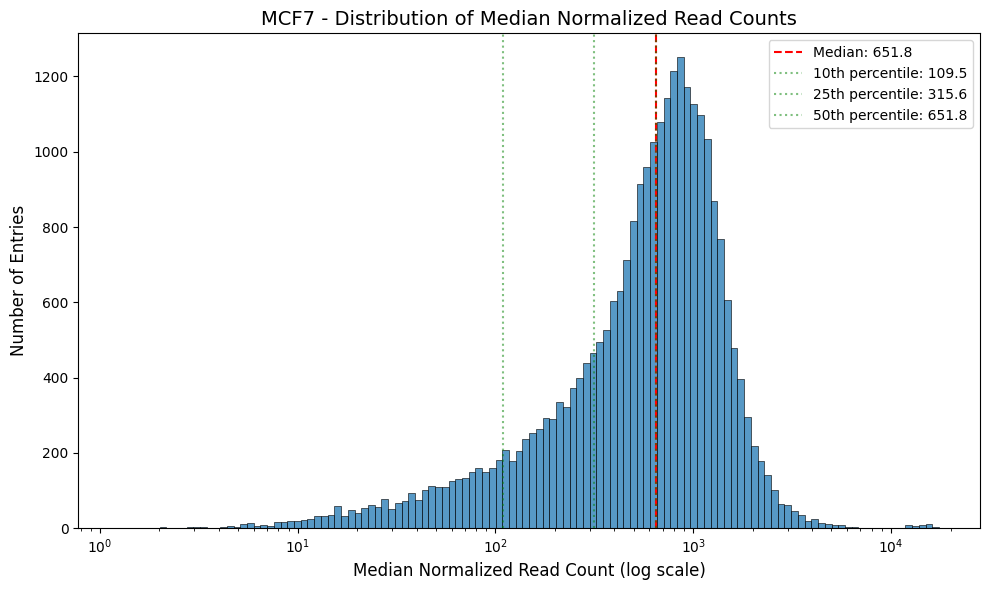


Suggested thresholds for MCF7:
- Median: 651.8
- 10th percentile: 109.5
- 25th percentile: 315.6
- 50th percentile: 651.8
MCF7: Removed 2502 rows below threshold 100 (9.2% of data)
Remaining entries: 24624
MCF7 shape after all filtering: (24624, 4)
MCF7 results shape: (24624, 4)


  9%|█████████▍                                                                                              | 1/11 [00:29<04:55, 29.59s/it]

Results saved to ./Timo_5UTR_data//MCF7_5UTR_analysis.csv
Successfully processed MCF7

Processing H23
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_H23-Fraction1_R1_001_counts.txt
Successfully read file with shape: (29080, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_H23-Fraction1_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_H23-Fraction2_R1_001_counts.txt
Successfully read file with shape: (29417, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_H23-Fraction2_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_H23-Fraction3_R1_001_counts.txt
Successfully read file with shape: (28960, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_H23-Fraction3_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR

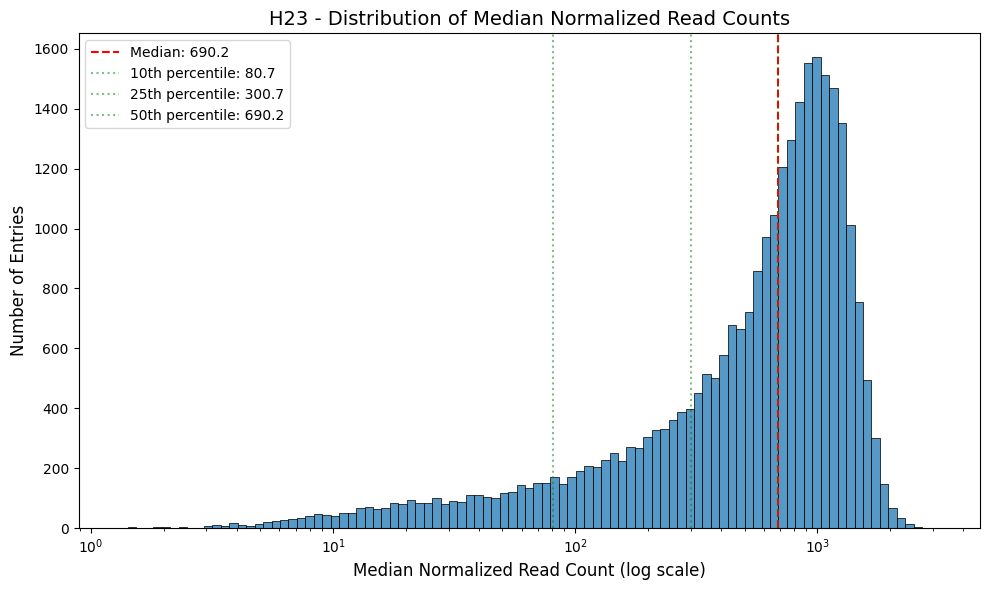


Suggested thresholds for H23:
- Median: 690.2
- 10th percentile: 80.7
- 25th percentile: 300.7
- 50th percentile: 690.2
H23: Removed 3274 rows below threshold 100 (11.5% of data)
Remaining entries: 25143
H23 shape after all filtering: (25143, 4)
H23 results shape: (25143, 4)


 18%|██████████████████▉                                                                                     | 2/11 [00:59<04:28, 29.85s/it]

Results saved to ./Timo_5UTR_data//H23_5UTR_analysis.csv
Successfully processed H23

Processing H9
Error processing H9: name 'Path' is not defined
Failed to process H9

Processing PC3
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_PC3-Fraction1_R1_001_counts.txt
Successfully read file with shape: (29224, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_PC3-Fraction1_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_PC3-Fraction2_R1_001_counts.txt
Successfully read file with shape: (29101, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_PC3-Fraction2_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_PC3-Fraction3_R1_001_counts.txt
Successfully read file with shape: (29422, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_d

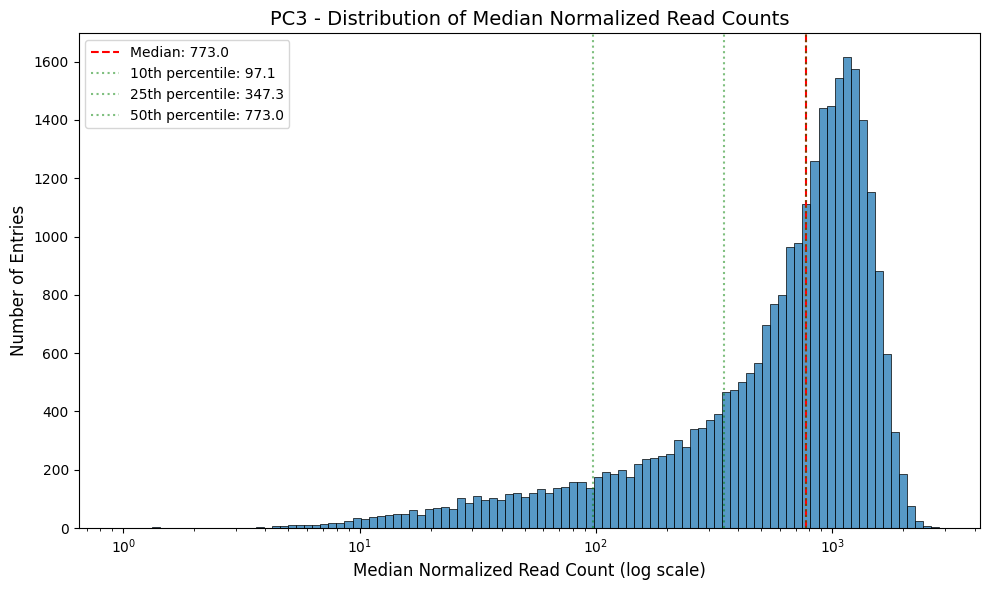


Suggested thresholds for PC3:
- Median: 773.0
- 10th percentile: 97.1
- 25th percentile: 347.3
- 50th percentile: 773.0
PC3: Removed 2911 rows below threshold 100 (10.2% of data)
Remaining entries: 25515
PC3 shape after all filtering: (25515, 4)
PC3 results shape: (25515, 4)


 36%|█████████████████████████████████████▊                                                                  | 4/11 [01:29<02:24, 20.63s/it]

Results saved to ./Timo_5UTR_data//PC3_5UTR_analysis.csv
Successfully processed PC3

Processing A549
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_A549-Fraction1_R1_001_counts.txt
Successfully read file with shape: (29367, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_A549-Fraction1_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_A549-Fraction2_R1_001_counts.txt
Successfully read file with shape: (29467, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_A549-Fraction2_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_A549-Fraction3_R1_001_counts.txt
Successfully read file with shape: (29405, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_A549-Fraction3_R1_001_counts.txt
Reading file: /home/yanyichu/

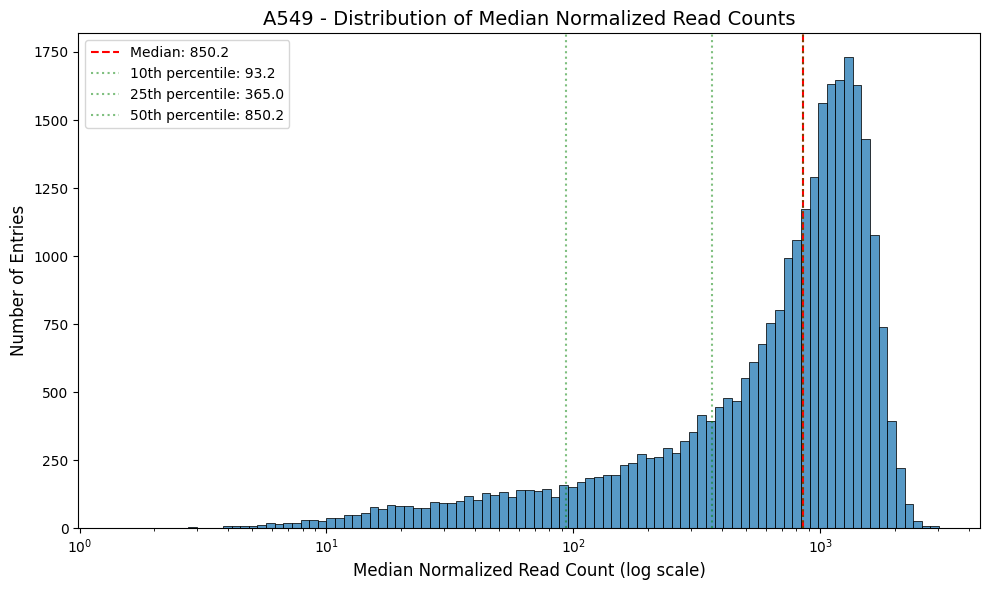


Suggested thresholds for A549:
- Median: 850.2
- 10th percentile: 93.2
- 25th percentile: 365.0
- 50th percentile: 850.2
A549: Removed 3018 rows below threshold 100 (10.5% of data)
Remaining entries: 25806
A549 shape after all filtering: (25806, 4)
A549 results shape: (25806, 4)


 45%|███████████████████████████████████████████████▎                                                        | 5/11 [02:00<02:22, 23.74s/it]

Results saved to ./Timo_5UTR_data//A549_5UTR_analysis.csv
Successfully processed A549

Processing MP2
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_MP2-Fraction1_R1_001_counts.txt
Successfully read file with shape: (29413, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_MP2-Fraction1_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_MP2-Fraction2_R1_001_counts.txt
Successfully read file with shape: (29448, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_MP2-Fraction2_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_MP2-Fraction3_R1_001_counts.txt
Successfully read file with shape: (29414, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_MP2-Fraction3_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR

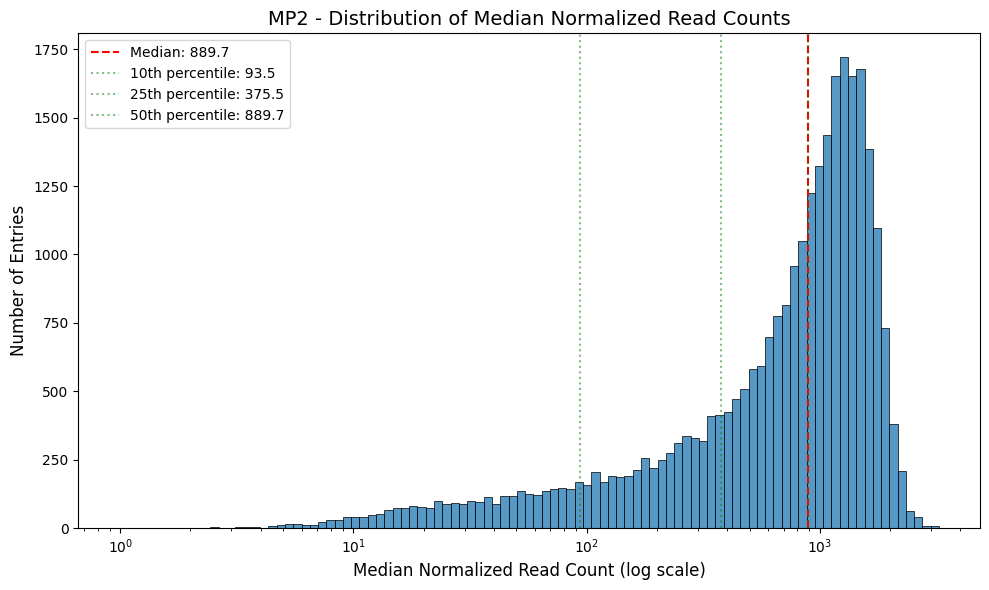


Suggested thresholds for MP2:
- Median: 889.7
- 10th percentile: 93.5
- 25th percentile: 375.5
- 50th percentile: 889.7
MP2: Removed 3015 rows below threshold 100 (10.4% of data)
Remaining entries: 25854
MP2 shape after all filtering: (25854, 4)
MP2 results shape: (25854, 4)


 55%|████████████████████████████████████████████████████████▋                                               | 6/11 [02:31<02:09, 25.96s/it]

Results saved to ./Timo_5UTR_data//MP2_5UTR_analysis.csv
Successfully processed MP2

Processing K562
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_K562-Fraction1_R1_001_counts.txt
Successfully read file with shape: (29237, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_K562-Fraction1_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_K562-Fraction2_R1_001_counts.txt
Successfully read file with shape: (29194, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_K562-Fraction2_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_K562-Fraction3_R1_001_counts.txt
Successfully read file with shape: (29034, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_K562-Fraction3_R1_001_counts.txt
Reading file: /home/yanyichu/

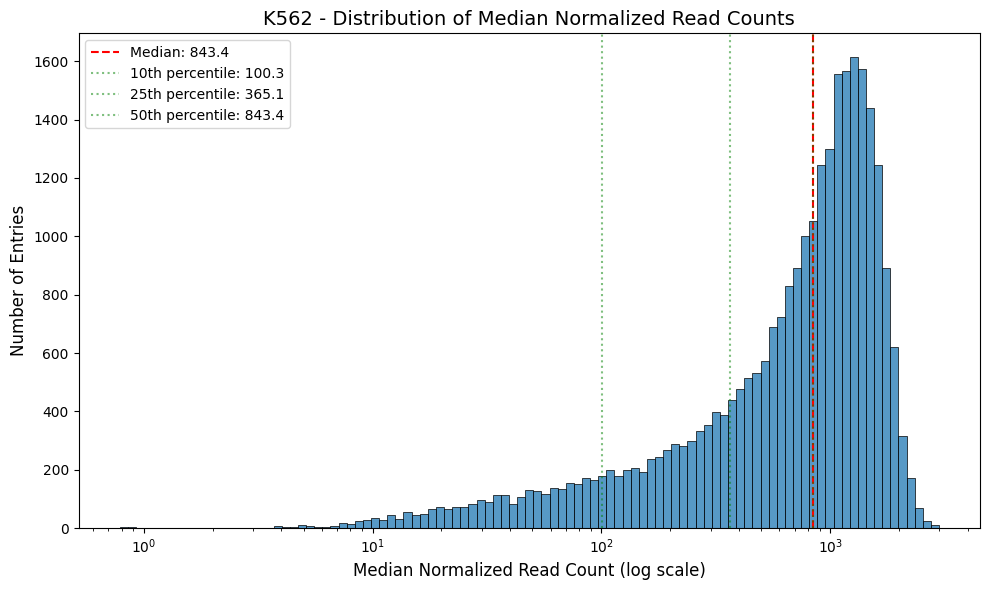


Suggested thresholds for K562:
- Median: 843.4
- 10th percentile: 100.3
- 25th percentile: 365.1
- 50th percentile: 843.4
K562: Removed 2827 rows below threshold 100 (10.0% of data)
Remaining entries: 25536
K562 shape after all filtering: (25536, 4)
K562 results shape: (25536, 4)


 64%|██████████████████████████████████████████████████████████████████▏                                     | 7/11 [03:02<01:49, 27.34s/it]

Results saved to ./Timo_5UTR_data//K562_5UTR_analysis.csv
Successfully processed K562

Processing Colo320
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_Colo320-Fraction1_R1_001_counts.txt
Successfully read file with shape: (27736, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_Colo320-Fraction1_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_Colo320-Fraction2_R1_001_counts.txt
Successfully read file with shape: (27839, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_Colo320-Fraction2_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_Colo320-Fraction3_R1_001_counts.txt
Successfully read file with shape: (27702, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_Colo320-Fraction3_R1_001_counts.txt
Readin

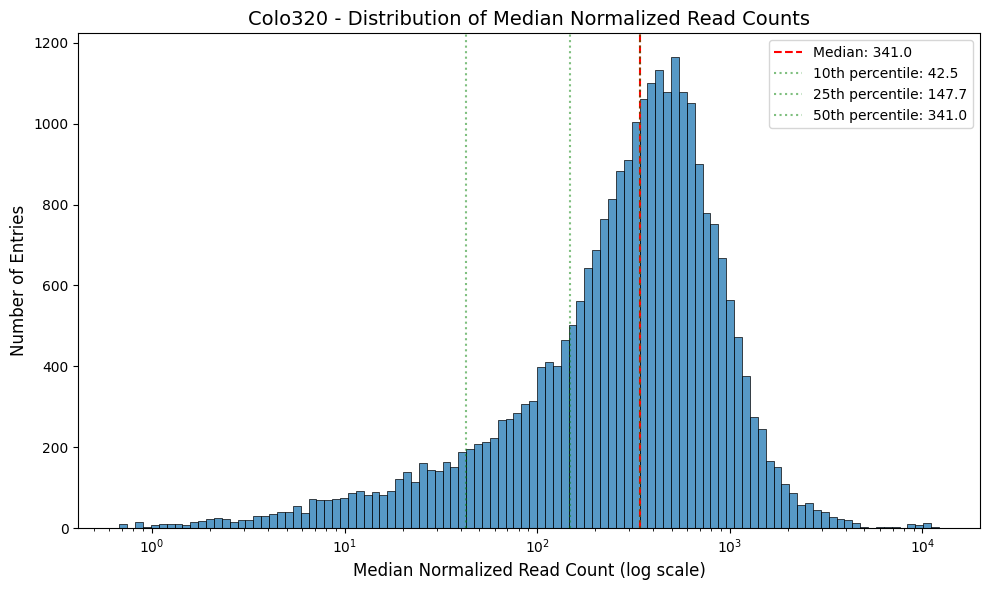


Suggested thresholds for Colo320:
- Median: 341.0
- 10th percentile: 42.5
- 25th percentile: 147.7
- 50th percentile: 341.0
Colo320: Removed 5006 rows below threshold 100 (18.6% of data)
Remaining entries: 21980
Colo320 shape after all filtering: (21980, 4)
Colo320 results shape: (21980, 4)


 73%|███████████████████████████████████████████████████████████████████████████▋                            | 8/11 [03:28<01:21, 27.02s/it]

Results saved to ./Timo_5UTR_data//Colo320_5UTR_analysis.csv
Successfully processed Colo320

Processing HCT116
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_HCT116-Fraction1_R1_001_counts.txt
Successfully read file with shape: (29720, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_HCT116-Fraction1_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_HCT116-Fraction2_R1_001_counts.txt
Successfully read file with shape: (29722, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_HCT116-Fraction2_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_HCT116-Fraction3_R1_001_counts.txt
Successfully read file with shape: (29688, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_HCT116-Fraction3_R1_001_counts.txt
Reading

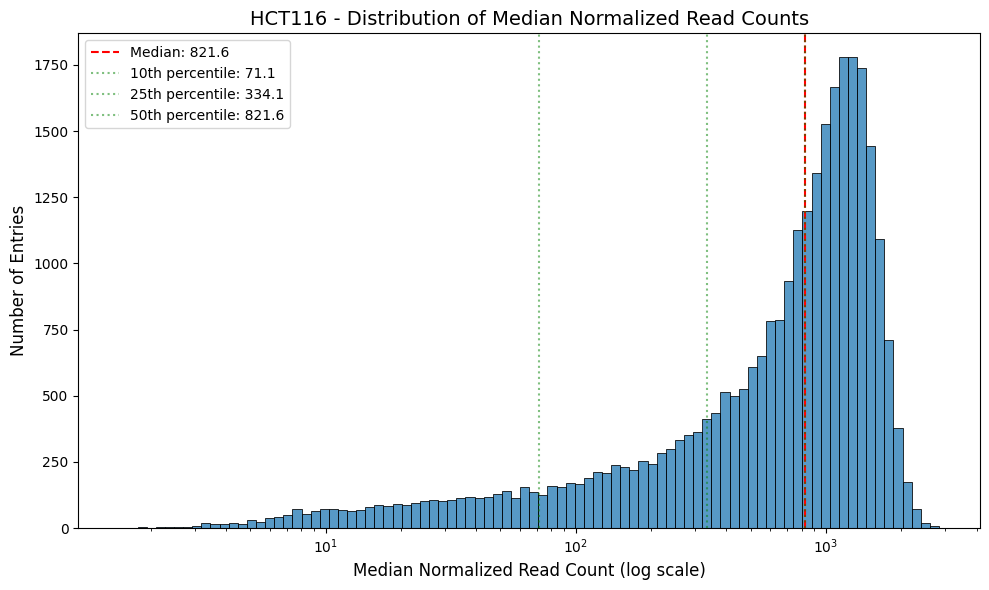


Suggested thresholds for HCT116:
- Median: 821.6
- 10th percentile: 71.1
- 25th percentile: 334.1
- 50th percentile: 821.6
HCT116: Removed 3546 rows below threshold 100 (12.1% of data)
Remaining entries: 25774
HCT116 shape after all filtering: (25774, 4)
HCT116 results shape: (25774, 4)


 82%|█████████████████████████████████████████████████████████████████████████████████████                   | 9/11 [03:59<00:56, 28.12s/it]

Results saved to ./Timo_5UTR_data//HCT116_5UTR_analysis.csv
Successfully processed HCT116

Processing H9-Rep1
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_H9-Rep1-Fraction1_R1_001_counts.txt
Successfully read file with shape: (29490, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_H9-Rep1-Fraction1_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_H9-Rep1-Fraction2_R1_001_counts.txt
Successfully read file with shape: (29505, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_H9-Rep1-Fraction2_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_H9-Rep1-Fraction3_R1_001_counts.txt
Successfully read file with shape: (29409, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_H9-Rep1-Fraction3_R1_001_counts.txt
Re

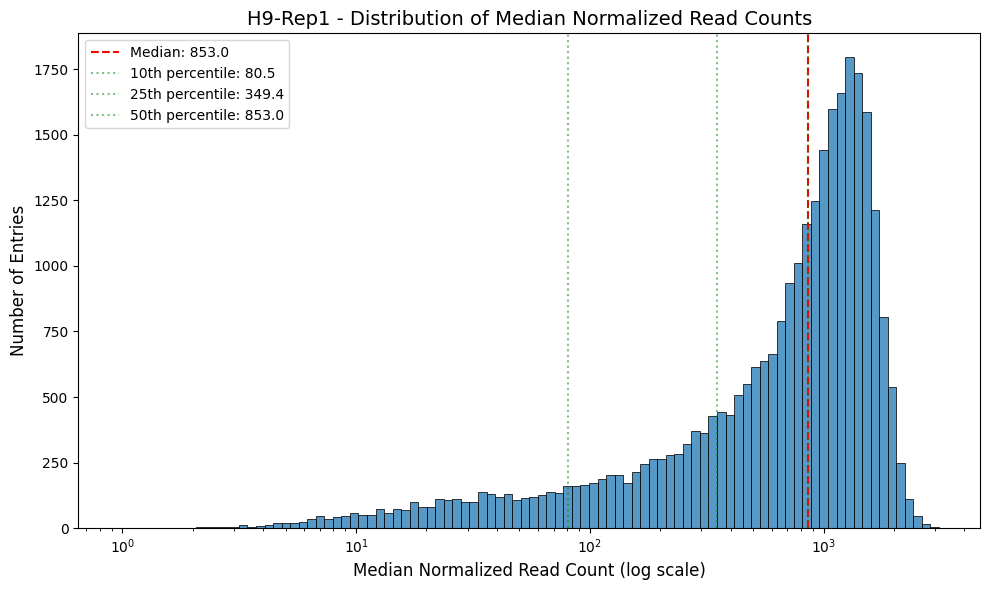


Suggested thresholds for H9-Rep1:
- Median: 853.0
- 10th percentile: 80.5
- 25th percentile: 349.4
- 50th percentile: 853.0
H9-Rep1: Removed 3323 rows below threshold 100 (11.4% of data)
Remaining entries: 25737
H9-Rep1 shape after all filtering: (25737, 4)
H9-Rep1 results shape: (25737, 4)


 91%|█████████████████████████████████████████████████████████████████████████████████████████████▋         | 10/11 [04:29<00:28, 28.96s/it]

Results saved to ./Timo_5UTR_data//H9_Rep1_5UTR_analysis.csv
Successfully processed H9-Rep1

Processing H9-Rep2
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_H9-Rep2-Fraction1_R1_001_counts.txt
Successfully read file with shape: (29496, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_H9-Rep2-Fraction1_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_H9-Rep2-Fraction2_R1_001_counts.txt
Successfully read file with shape: (29408, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_H9-Rep2-Fraction2_R1_001_counts.txt
Reading file: /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_H9-Rep2-Fraction3_R1_001_counts.txt
Successfully read file with shape: (29489, 1)
Removing unaligned reads entry ('*') from /home/yanyichu/1_UTR_Cell_Type/4_Timo/count_data/021425_5UTR_H9-Rep2-Fraction3_R1_001_counts.txt


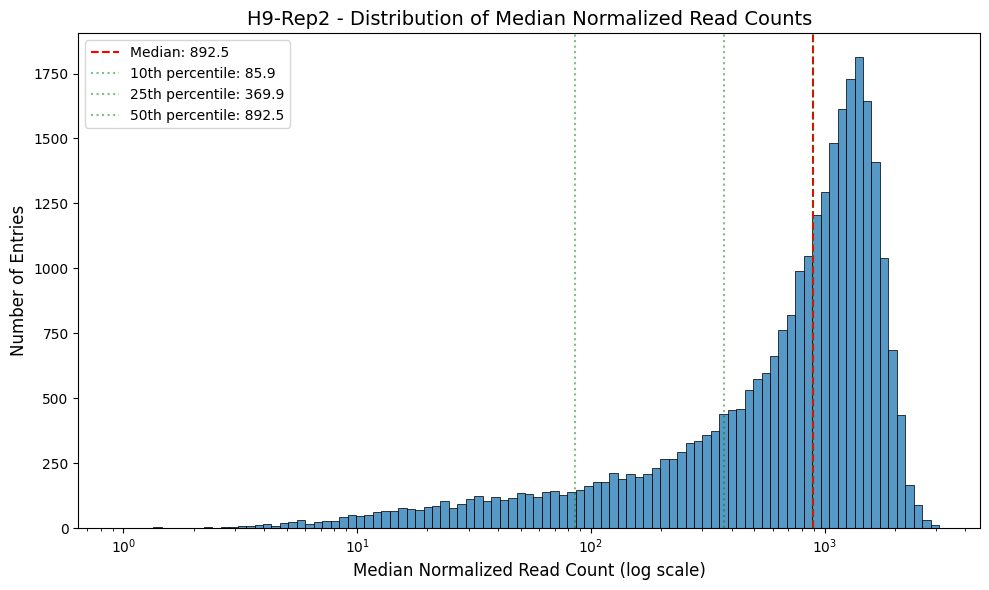


Suggested thresholds for H9-Rep2:
- Median: 892.5
- 10th percentile: 85.9
- 25th percentile: 369.9
- 50th percentile: 892.5
H9-Rep2: Removed 3191 rows below threshold 100 (11.0% of data)
Remaining entries: 25835
H9-Rep2 shape after all filtering: (25835, 4)
H9-Rep2 results shape: (25835, 4)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [05:00<00:00, 27.34s/it]

Results saved to ./Timo_5UTR_data//H9_Rep2_5UTR_analysis.csv
Successfully processed H9-Rep2

PROCESSING SUMMARY
Successfully processed 20 cell lines:
- c1_Rep1
- c1_Rep2
- c17_Rep1
- c17_Rep2
- c2_Rep1
- c2_Rep2
- c4_Rep1
- c4_Rep2
- c6_Rep1
- c6_Rep2
- MCF7
- H23
- PC3
- A549
- MP2
- K562
- Colo320
- HCT116
- H9-Rep1
- H9-Rep2


In [8]:
# Process each remaining cell line
for cell_line in tqdm(remaining_cell_lines):

    if cell_line != 'MCF7':
        result = process_cell_line_timo(cell_line, fasta_df, 
                               counts_dir = Timo_COUNTS_DIR, output_dir = Timo_OUTPUT_DIR, 
                                   utr_type = '5UTR', date_str = '021425')
    else:
        result = process_cell_line_timo(cell_line, fasta_df, 
                               counts_dir = Timo_COUNTS_DIR, output_dir = Timo_OUTPUT_DIR, 
                                   utr_type = '5UTR', date_str = '030325')
                                   
    if result is not None:
        all_results[cell_line] = result
        print(f"Successfully processed {cell_line}")
    else:
        print(f"Failed to process {cell_line}")

# Print summary
print("\n" + "="*50)
print("PROCESSING SUMMARY")
print("="*50)
print(f"Successfully processed {len(all_results)} cell lines:")
for cl in all_results:
    print(f"- {cl}")

### Process All Cell Lines in a Loop and store results as .csv files

In [9]:
for i, (cell_type, result) in enumerate(all_results.items()):
    
    result['cell_type'] = cell_type
    print(cell_type, len(result))
    
    if i == 0:
        merged_df = deepcopy(result)
    else:
        merged_df = pd.concat([merged_df, result], axis = 0)

print(len(merged_df))
merged_df = merged_df.sample(frac = 1)
merged_df

c1_Rep1 23415
c1_Rep2 23202
c17_Rep1 25360
c17_Rep2 26387
c2_Rep1 20952
c2_Rep2 21145
c4_Rep1 24250
c4_Rep2 23994
c6_Rep1 25558
c6_Rep2 25849
MCF7 24624
H23 25143
PC3 25515
A549 25806
MP2 25854
K562 25536
Colo320 21980
HCT116 25774
H9-Rep1 25737
H9-Rep2 25835
491916


,sequence,center_of_mass,z_score,total_counts,adjusted_z_score,cell_type,ID
9305,CCGGGCGCTTCAGGCTGGCTTGGGTCCTGCTGCTCCAACCCCAAGG...,2.403375,-3.302123,1459.880311,-0.967686,c2_Rep2,NaN
23471,CGCCCGGGCGGGGTCCGCGCTGAGCCGCCTTCTCGGCCGCCTGGTC...,2.650058,12.244997,8323.569189,1.229765,c6_Rep2,NaN
9492,GAATCCCGTGTGTGGACCGCCGTTCCCTCTTCGCGGGATCGTTGGC...,2.575514,2.723055,1625.418403,0.374567,Colo320,GALNT13_part_14_type_middle_overlap_50
20850,AGAGGCGACTCTGGAGCTCTGTGACGGCGCCAAGCGTGACCCACCC...,2.487079,-0.376264,1059.986499,-0.117468,c2_Rep2,NaN
19806,TCAGACGCCACGCAGGCTGCCGTCACCCTTCCGGGTGACATACCGG...,2.476947,-1.783131,7478.824766,-0.188938,c6_Rep1,NaN
...,...,...,...,...,...,...,...
5566,TTGTAGCTGGAGAGAAGTGTCACATTTTGCTCACTCTCAACCTTCC...,2.424627,-2.135839,1003.731573,-0.561303,HCT116,CPA6_part_4_type_middle_overlap_50
17742,CTGAACCTGTCCACCCCGGGCGCATCAAGATCTTCCAGCTGGGTAC...,2.499283,-0.036243,3196.763159,-0.002477,A549,OTX2_part_9_type_middle_overlap_50
25823,GACGCCGGAGACGTAGGAGTGGGTCTTCAGACTCCAAAGGGGTTGG...,2.446066,-1.975440,1676.937178,-0.578725,H9-Rep2,TKTL1_part_2_type_rightmost_overlap_70
8512,GCGGGGGGCACGAGGGACAGCTGAGGGAAGGGAGGACGCGAGAGAA...,2.526403,0.925843,1536.968295,0.210867,A549,FAM72D_part_8_type_middle_overlap_50


# Split and Calculate Diff

In [10]:
# 设置随机种子以保证结果可复现
np.random.seed(42)

# 初始化fold列
merged_df['fold'] = 'train'

# 计算每个序列出现在多少个细胞类型中
seq_cell_counts = merged_df.groupby('sequence')['cell_type'].nunique()
print(f"共有 {len(seq_cell_counts)} 个唯一序列")
print(f"其中有 {(seq_cell_counts > 1).sum()} 个序列出现在多个细胞类型中")

# 对每个序列单独处理
val_assignments = 0  # 计数器
for seq in tqdm(merged_df['sequence'].unique()):
    seq_data = merged_df[merged_df['sequence'] == seq]
    cell_types = seq_data['cell_type'].unique()
    num_cell_types = len(cell_types)
    
    if num_cell_types == 1:
        # 如果序列只在一个细胞类型中出现，全部放入训练集
        continue  # 默认已经是'train'
    elif num_cell_types == 2:
        # 如果序列在两个细胞类型中出现，随机选一个放入验证集
        val_cell = np.random.choice(cell_types, size=1)[0]
        merged_df.loc[(merged_df['sequence'] == seq) & 
                     (merged_df['cell_type'] == val_cell), 'fold'] = 'val'
        val_assignments += 1
    else:
        # 如果序列在超过两个细胞类型中出现，随机选择约10%的细胞类型放入验证集
        val_size = max(1, int(num_cell_types * 0.1))  # 至少选择1个细胞类型
        val_cells = np.random.choice(cell_types, size=val_size, replace=False)
        merged_df.loc[(merged_df['sequence'] == seq) & 
                    (merged_df['cell_type'].isin(val_cells)), 'fold'] = 'val'
        val_assignments += len(val_cells)

print(f"总共有 {val_assignments} 次验证集分配操作")
print(f"完成后fold分布: {merged_df['fold'].value_counts()}")

merged_df

共有 27125 个唯一序列
其中有 26700 个序列出现在多个细胞类型中


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 27125/27125 [29:24<00:00, 15.37it/s]


总共有 46244 次验证集分配操作
完成后fold分布: fold
train    445672
val       46244
Name: count, dtype: int64


,sequence,center_of_mass,z_score,total_counts,adjusted_z_score,cell_type,ID,fold
9305,CCGGGCGCTTCAGGCTGGCTTGGGTCCTGCTGCTCCAACCCCAAGG...,2.403375,-3.302123,1459.880311,-0.967686,c2_Rep2,NaN,val
23471,CGCCCGGGCGGGGTCCGCGCTGAGCCGCCTTCTCGGCCGCCTGGTC...,2.650058,12.244997,8323.569189,1.229765,c6_Rep2,NaN,train
9492,GAATCCCGTGTGTGGACCGCCGTTCCCTCTTCGCGGGATCGTTGGC...,2.575514,2.723055,1625.418403,0.374567,Colo320,GALNT13_part_14_type_middle_overlap_50,train
20850,AGAGGCGACTCTGGAGCTCTGTGACGGCGCCAAGCGTGACCCACCC...,2.487079,-0.376264,1059.986499,-0.117468,c2_Rep2,NaN,val
19806,TCAGACGCCACGCAGGCTGCCGTCACCCTTCCGGGTGACATACCGG...,2.476947,-1.783131,7478.824766,-0.188938,c6_Rep1,NaN,train
...,...,...,...,...,...,...,...,...
5566,TTGTAGCTGGAGAGAAGTGTCACATTTTGCTCACTCTCAACCTTCC...,2.424627,-2.135839,1003.731573,-0.561303,HCT116,CPA6_part_4_type_middle_overlap_50,val
17742,CTGAACCTGTCCACCCCGGGCGCATCAAGATCTTCCAGCTGGGTAC...,2.499283,-0.036243,3196.763159,-0.002477,A549,OTX2_part_9_type_middle_overlap_50,train
25823,GACGCCGGAGACGTAGGAGTGGGTCTTCAGACTCCAAAGGGGTTGG...,2.446066,-1.975440,1676.937178,-0.578725,H9-Rep2,TKTL1_part_2_type_rightmost_overlap_70,train
8512,GCGGGGGGCACGAGGGACAGCTGAGGGAAGGGAGGACGCGAGAGAA...,2.526403,0.925843,1536.968295,0.210867,A549,FAM72D_part_8_type_middle_overlap_50,train


In [11]:
# 只使用训练集数据计算每个序列的平均活性
train_data = merged_df[merged_df['fold'] == 'train']
sequence_mean_train = train_data.groupby('sequence')['center_of_mass'].mean()

# 为所有数据应用训练集计算的统计量
merged_df['mean_center_of_mass'] = merged_df['sequence'].map(sequence_mean_train)

# 计算diff和z_score
merged_df['diff'] = merged_df['center_of_mass'] - merged_df['mean_center_of_mass']
merged_df

,sequence,center_of_mass,z_score,total_counts,adjusted_z_score,cell_type,ID,fold,mean_center_of_mass,diff
9305,CCGGGCGCTTCAGGCTGGCTTGGGTCCTGCTGCTCCAACCCCAAGG...,2.403375,-3.302123,1459.880311,-0.967686,c2_Rep2,NaN,val,2.392399,0.010976
23471,CGCCCGGGCGGGGTCCGCGCTGAGCCGCCTTCTCGGCCGCCTGGTC...,2.650058,12.244997,8323.569189,1.229765,c6_Rep2,NaN,train,2.576518,0.073540
9492,GAATCCCGTGTGTGGACCGCCGTTCCCTCTTCGCGGGATCGTTGGC...,2.575514,2.723055,1625.418403,0.374567,Colo320,GALNT13_part_14_type_middle_overlap_50,train,2.525058,0.050456
20850,AGAGGCGACTCTGGAGCTCTGTGACGGCGCCAAGCGTGACCCACCC...,2.487079,-0.376264,1059.986499,-0.117468,c2_Rep2,NaN,val,2.405623,0.081455
19806,TCAGACGCCACGCAGGCTGCCGTCACCCTTCCGGGTGACATACCGG...,2.476947,-1.783131,7478.824766,-0.188938,c6_Rep1,NaN,train,2.583762,-0.106815
...,...,...,...,...,...,...,...,...,...,...
5566,TTGTAGCTGGAGAGAAGTGTCACATTTTGCTCACTCTCAACCTTCC...,2.424627,-2.135839,1003.731573,-0.561303,HCT116,CPA6_part_4_type_middle_overlap_50,val,2.478830,-0.054203
17742,CTGAACCTGTCCACCCCGGGCGCATCAAGATCTTCCAGCTGGGTAC...,2.499283,-0.036243,3196.763159,-0.002477,A549,OTX2_part_9_type_middle_overlap_50,train,2.532763,-0.033480
25823,GACGCCGGAGACGTAGGAGTGGGTCTTCAGACTCCAAAGGGGTTGG...,2.446066,-1.975440,1676.937178,-0.578725,H9-Rep2,TKTL1_part_2_type_rightmost_overlap_70,train,2.578449,-0.132383
8512,GCGGGGGGCACGAGGGACAGCTGAGGGAAGGGAGGACGCGAGAGAA...,2.526403,0.925843,1536.968295,0.210867,A549,FAM72D_part_8_type_middle_overlap_50,train,2.586648,-0.060244


In [12]:
# First, get all unique cell types and create a mapping dictionary
unique_cell_types = merged_df['cell_type'].unique()
cell_type_mapping = {cell_type: i for i, cell_type in enumerate(unique_cell_types)}

# Now create the new column with the numerical encoding
merged_df['cell_type_code'] = merged_df['cell_type'].map(cell_type_mapping)

# Let's see the mapping
print("Cell type to code mapping:")
for cell_type, code in cell_type_mapping.items():
    print(f"{cell_type}: {code}")

merged_df

Cell type to code mapping:
c2_Rep2: 0
c6_Rep2: 1
Colo320: 2
c6_Rep1: 3
K562: 4
c4_Rep2: 5
H9-Rep2: 6
c1_Rep2: 7
HCT116: 8
c17_Rep2: 9
c4_Rep1: 10
H23: 11
A549: 12
PC3: 13
c2_Rep1: 14
MP2: 15
H9-Rep1: 16
MCF7: 17
c1_Rep1: 18
c17_Rep1: 19


,sequence,center_of_mass,z_score,total_counts,adjusted_z_score,cell_type,ID,fold,mean_center_of_mass,diff,cell_type_code
9305,CCGGGCGCTTCAGGCTGGCTTGGGTCCTGCTGCTCCAACCCCAAGG...,2.403375,-3.302123,1459.880311,-0.967686,c2_Rep2,NaN,val,2.392399,0.010976,0
23471,CGCCCGGGCGGGGTCCGCGCTGAGCCGCCTTCTCGGCCGCCTGGTC...,2.650058,12.244997,8323.569189,1.229765,c6_Rep2,NaN,train,2.576518,0.073540,1
9492,GAATCCCGTGTGTGGACCGCCGTTCCCTCTTCGCGGGATCGTTGGC...,2.575514,2.723055,1625.418403,0.374567,Colo320,GALNT13_part_14_type_middle_overlap_50,train,2.525058,0.050456,2
20850,AGAGGCGACTCTGGAGCTCTGTGACGGCGCCAAGCGTGACCCACCC...,2.487079,-0.376264,1059.986499,-0.117468,c2_Rep2,NaN,val,2.405623,0.081455,0
19806,TCAGACGCCACGCAGGCTGCCGTCACCCTTCCGGGTGACATACCGG...,2.476947,-1.783131,7478.824766,-0.188938,c6_Rep1,NaN,train,2.583762,-0.106815,3
...,...,...,...,...,...,...,...,...,...,...,...
5566,TTGTAGCTGGAGAGAAGTGTCACATTTTGCTCACTCTCAACCTTCC...,2.424627,-2.135839,1003.731573,-0.561303,HCT116,CPA6_part_4_type_middle_overlap_50,val,2.478830,-0.054203,8
17742,CTGAACCTGTCCACCCCGGGCGCATCAAGATCTTCCAGCTGGGTAC...,2.499283,-0.036243,3196.763159,-0.002477,A549,OTX2_part_9_type_middle_overlap_50,train,2.532763,-0.033480,12
25823,GACGCCGGAGACGTAGGAGTGGGTCTTCAGACTCCAAAGGGGTTGG...,2.446066,-1.975440,1676.937178,-0.578725,H9-Rep2,TKTL1_part_2_type_rightmost_overlap_70,train,2.578449,-0.132383,6
8512,GCGGGGGGCACGAGGGACAGCTGAGGGAAGGGAGGACGCGAGAGAA...,2.526403,0.925843,1536.968295,0.210867,A549,FAM72D_part_8_type_middle_overlap_50,train,2.586648,-0.060244,12


In [13]:
# 检查训练集和验证集的比例
train_count = (merged_df['fold'] == 'train').sum()
val_count = (merged_df['fold'] == 'val').sum()
print(f"训练集样本数: {train_count} ({train_count/(train_count+val_count)*100:.1f}%)")
print(f"验证集样本数: {val_count} ({val_count/(train_count+val_count)*100:.1f}%)")

# 检查有多少序列同时出现在训练集和验证集中
train_seqs = set(merged_df[merged_df['fold'] == 'train']['sequence'])
val_seqs = set(merged_df[merged_df['fold'] == 'val']['sequence'])
overlap_seqs = train_seqs.intersection(val_seqs)
print(f"同时出现在训练集和验证集中的序列数: {len(overlap_seqs)}")

训练集样本数: 445672 (90.6%)
验证集样本数: 46244 (9.4%)
同时出现在训练集和验证集中的序列数: 26700


**Step 5:Create Visualization PDFs (Histograms)**

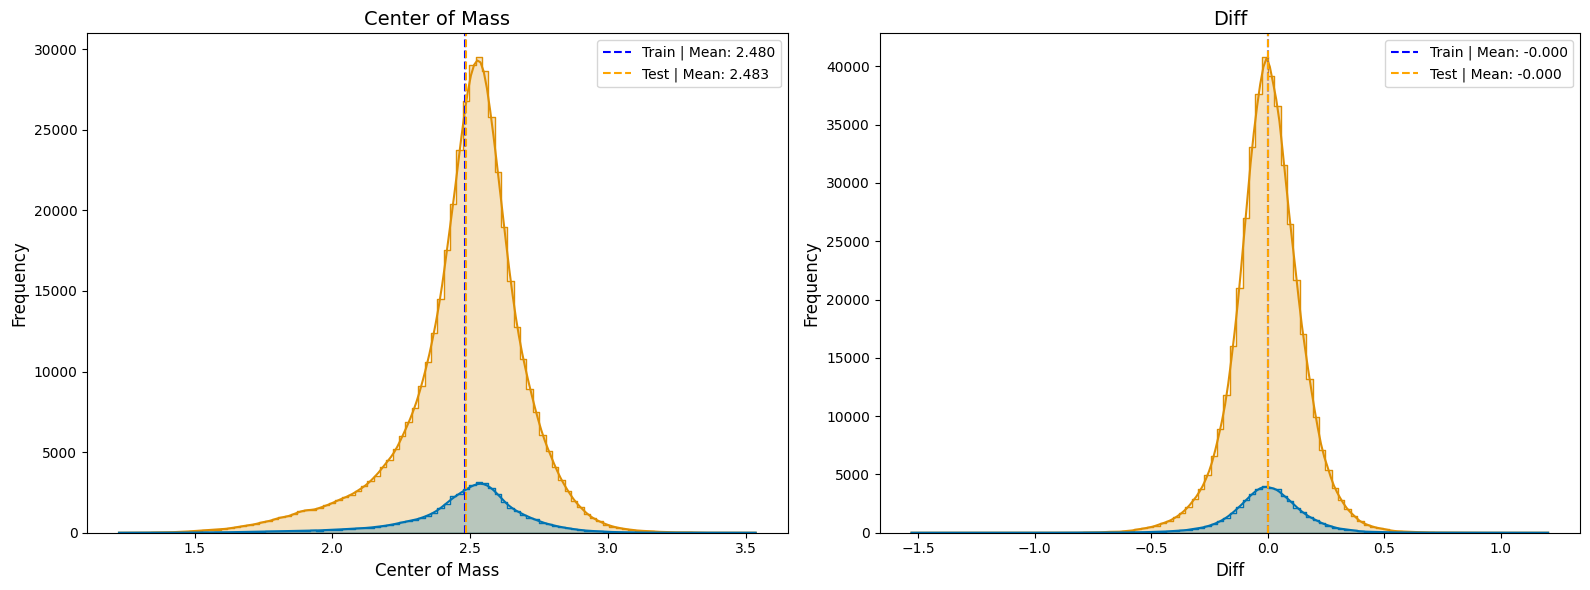

Center of Mass 统计:
          count      mean       std       min       25%       50%       75%  \
fold                                                                          
train  445672.0  2.480322  0.214359  1.226222  2.393806  2.509106  2.603256   
val     46244.0  2.482797  0.212912  1.320668  2.398414  2.512037  2.602350   

            max  
fold             
train  3.534295  
val    3.428426  

Diff 统计:
          count          mean       std       min       25%       50%  \
fold                                                                    
train  445672.0 -5.380822e-19  0.146041 -1.170801 -0.081910  0.000276   
val     46244.0 -4.175735e-04  0.157559 -1.528963 -0.086739 -0.000133   

            75%       max  
fold                       
train  0.085778  1.203144  
val    0.089016  1.071841  


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置图表风格
# plt.style.use('seaborn-whitegrid')
sns.set_palette("colorblind")

# 创建图表
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. center_of_mass 分布图
sns.histplot(
    data=merged_df, x="center_of_mass", hue="fold",
    kde=True, bins=100, element="step",
    ax=axes[0]
)
axes[0].set_title('Center of Mass', fontsize=14)
axes[0].set_xlabel('Center of Mass', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# 添加均值线
train_com_mean = merged_df[merged_df['fold'] == 'train']['center_of_mass'].mean()
val_com_mean = merged_df[merged_df['fold'] == 'val']['center_of_mass'].mean()
axes[0].axvline(train_com_mean, color='blue', linestyle='--', label=f'Train | Mean: {train_com_mean:.3f}')
axes[0].axvline(val_com_mean, color='orange', linestyle='--', label=f'Test | Mean: {val_com_mean:.3f}')
axes[0].legend()

# 2. diff 分布图
sns.histplot(
    data=merged_df, x="diff", hue="fold",
    kde=True, bins=100, element="step",
    ax=axes[1]
)
axes[1].set_title('Diff', fontsize=14)
axes[1].set_xlabel('Diff', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

# 添加均值线
train_diff_mean = merged_df[merged_df['fold'] == 'train']['diff'].mean()
val_diff_mean = merged_df[merged_df['fold'] == 'val']['diff'].mean()
axes[1].axvline(train_diff_mean, color='blue', linestyle='--', label=f'Train | Mean: {train_diff_mean:.3f}')
axes[1].axvline(val_diff_mean, color='orange', linestyle='--', label=f'Test | Mean: {val_diff_mean:.3f}')
axes[1].legend()

# 调整布局并显示
plt.tight_layout()
plt.savefig('vJun26_5UTR_mincount100_Timo_Matt_Merged_CenterMass_Diff.pdf')
plt.show()

# 额外输出一些统计信息
print("Center of Mass 统计:")
print(merged_df.groupby('fold')['center_of_mass'].describe())
print("\nDiff 统计:")
print(merged_df.groupby('fold')['diff'].describe())

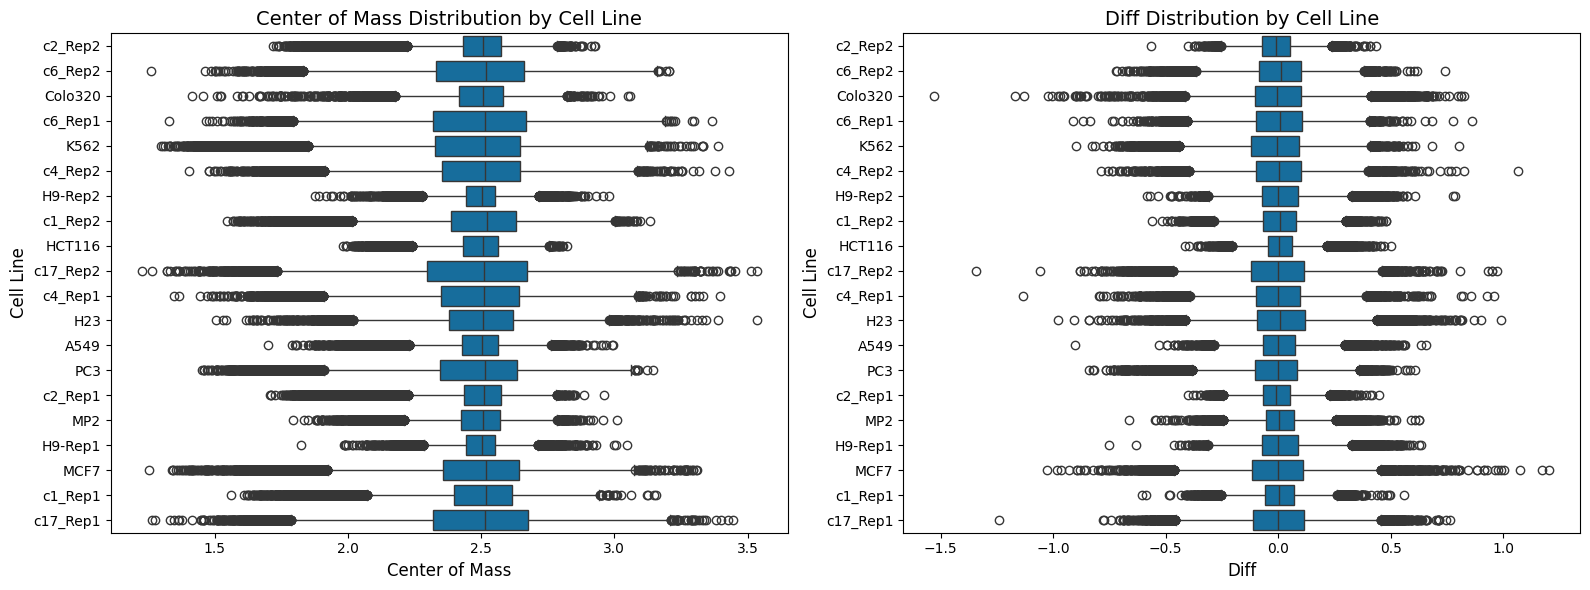

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置图表风格
sns.set_palette("colorblind")

# 额外的箱线图版本（更清晰地显示不同细胞系的分布差异）
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Center of Mass 箱线图
sns.boxplot(data=merged_df, y="cell_type", x="center_of_mass", ax=axes[0])
axes[0].set_title('Center of Mass Distribution by Cell Line', fontsize=14)
axes[0].set_xlabel('Center of Mass', fontsize=12)
axes[0].set_ylabel('Cell Line', fontsize=12)

# Diff 箱线图
sns.boxplot(data=merged_df, y="cell_type", x="diff", ax=axes[1])
axes[1].set_title('Diff Distribution by Cell Line', fontsize=14)
axes[1].set_xlabel('Diff', fontsize=12)
axes[1].set_ylabel('Cell Line', fontsize=12)

plt.tight_layout()
plt.savefig('vJun26_5UTR_mincount100_Timo_Matt_Merged_CenterMass_Diff_by_CellLine_Boxplot.pdf')
plt.show()

In [19]:
# Create improved visualization PDFs (landscape, 3 graphs per row)
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages
import math

# Define colors for each cell line (using a colorblind-friendly palette)
colors = sns.color_palette("colorblind", len(all_results))
cell_line_colors = {cell_line: color for cell_line, color in zip(all_results.keys(), colors)}

# Function to create a grid of plots for a given metric
def create_grid_pdf(output_filename, metric_name, metric_label):
    """
    Create a PDF with a grid of plots (3 per row) for a given metric
    
    Parameters:
    output_filename: Name of the output PDF file
    metric_name: Column name in the results dataframe 
    metric_label: Label for the x-axis and title
    """
    with PdfPages(f"{output_filename}") as pdf:
        # Calculate how many rows we need (3 plots per row)
        n_cell_lines = len(all_results)
        n_rows = math.ceil(n_cell_lines / 3)
        
        # Create grid plots
        fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows), layout='constrained')
        # Make axes a 2D array even if there's only one row
        if n_rows == 1:
            axes = axes.reshape(1, -1)
            
        # Counter for positioning plots
        plot_idx = 0
        
        # Create individual histograms in the grid
        for cell_line, results in all_results.items():
            # Calculate row and column position
            row = plot_idx // 3
            col = plot_idx % 3
            
            # Get data and calculate statistics
            data = results[metric_name].dropna()
            mean_val = data.mean()
            std_val = data.std()
            
            # Create histogram with wider bins on the appropriate subplot
            sns.histplot(data, bins=20, kde=True, color=cell_line_colors[cell_line], ax=axes[row, col])
            
            # Add labels and title
            axes[row, col].set_title(f"{cell_line} - {metric_label} Distribution", fontsize=12)
            axes[row, col].set_xlabel(metric_label, fontsize=10)
            axes[row, col].set_ylabel("Count", fontsize=10)
            
            # Add text with mean and std
            axes[row, col].annotate(f"Mean: {mean_val:.3f}\nStd Dev: {std_val:.3f}", 
                               xy=(0.5, 0.02), xycoords='axes fraction',
                               ha='center', fontsize=9,
                               bbox={"facecolor":"white", "alpha":0.7, "pad":3})
            
            plot_idx += 1
        
        # Hide any unused subplots
        for i in range(plot_idx, n_rows * 3):
            row = i // 3
            col = i % 3
            axes[row, col].axis('off')
        
        # Add overall title
        fig.suptitle(f"{metric_label} Distributions Across Cell Lines", fontsize=16, y=0.995)
        plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave room for suptitle
        pdf.savefig(orientation='landscape')
        plt.close()
        
        # Create overlay plot on a new page
        plt.figure(figsize=(12, 8))
        
        for cell_line, results in all_results.items():
            data = results[metric_name].dropna()
            # Use KDE for overlay plot
            sns.kdeplot(data, label=cell_line, color=cell_line_colors[cell_line], linewidth=2)
        
        plt.title(f"{metric_label} Across All Cell Lines", fontsize=14)
        plt.xlabel(metric_label, fontsize=12)
        plt.ylabel("Density", fontsize=12)
        plt.legend(title="Cell Line")
        plt.tight_layout()
        pdf.savefig(orientation='landscape')
        plt.close()

# Create PDFs for each metric
create_grid_pdf("vJun26_5UTR_mincount100_Timo_Matt_Merged_center_of_mass_histograms.pdf", "center_of_mass", "Center of Mass")
print(f"Created center_of_mass_histograms.pdf")

create_grid_pdf("vJun26_5UTR_mincount100_Timo_Matt_Merged_z_score_histograms.pdf", "z_score", "Z-Score")
print(f"Created z_score_histograms.pdf")

create_grid_pdf("vJun26_5UTR_mincount100_Timo_Matt_Merged_adjusted_z_score_histograms.pdf", "adjusted_z_score", "Adjusted Z-Score")
print(f"Created adjusted_z_score_histograms.pdf")

print("\nAll visualization PDFs created successfully!")

/tmp/ipykernel_1824246/3223556840.py:69: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave room for suptitle


Created center_of_mass_histograms.pdf


/tmp/ipykernel_1824246/3223556840.py:69: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave room for suptitle


Created z_score_histograms.pdf


/tmp/ipykernel_1824246/3223556840.py:69: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave room for suptitle


Created adjusted_z_score_histograms.pdf

All visualization PDFs created successfully!


In [17]:
merged_df.to_csv('vJun26_5UTR_Timo_Matt_Merged_data_mincount100.csv')
# vJun25_** remove 50% low_quality data for each cell line

In [18]:
merged_df

,sequence,center_of_mass,z_score,total_counts,adjusted_z_score,cell_type,ID,fold,mean_center_of_mass,diff,cell_type_code
9305,CCGGGCGCTTCAGGCTGGCTTGGGTCCTGCTGCTCCAACCCCAAGG...,2.403375,-3.302123,1459.880311,-0.967686,c2_Rep2,NaN,val,2.392399,0.010976,0
23471,CGCCCGGGCGGGGTCCGCGCTGAGCCGCCTTCTCGGCCGCCTGGTC...,2.650058,12.244997,8323.569189,1.229765,c6_Rep2,NaN,train,2.576518,0.073540,1
9492,GAATCCCGTGTGTGGACCGCCGTTCCCTCTTCGCGGGATCGTTGGC...,2.575514,2.723055,1625.418403,0.374567,Colo320,GALNT13_part_14_type_middle_overlap_50,train,2.525058,0.050456,2
20850,AGAGGCGACTCTGGAGCTCTGTGACGGCGCCAAGCGTGACCCACCC...,2.487079,-0.376264,1059.986499,-0.117468,c2_Rep2,NaN,val,2.405623,0.081455,0
19806,TCAGACGCCACGCAGGCTGCCGTCACCCTTCCGGGTGACATACCGG...,2.476947,-1.783131,7478.824766,-0.188938,c6_Rep1,NaN,train,2.583762,-0.106815,3
...,...,...,...,...,...,...,...,...,...,...,...
5566,TTGTAGCTGGAGAGAAGTGTCACATTTTGCTCACTCTCAACCTTCC...,2.424627,-2.135839,1003.731573,-0.561303,HCT116,CPA6_part_4_type_middle_overlap_50,val,2.478830,-0.054203,8
17742,CTGAACCTGTCCACCCCGGGCGCATCAAGATCTTCCAGCTGGGTAC...,2.499283,-0.036243,3196.763159,-0.002477,A549,OTX2_part_9_type_middle_overlap_50,train,2.532763,-0.033480,12
25823,GACGCCGGAGACGTAGGAGTGGGTCTTCAGACTCCAAAGGGGTTGG...,2.446066,-1.975440,1676.937178,-0.578725,H9-Rep2,TKTL1_part_2_type_rightmost_overlap_70,train,2.578449,-0.132383,6
8512,GCGGGGGGCACGAGGGACAGCTGAGGGAAGGGAGGACGCGAGAGAA...,2.526403,0.925843,1536.968295,0.210867,A549,FAM72D_part_8_type_middle_overlap_50,train,2.586648,-0.060244,12


# Matt's Data Orginal Process, do not use

### Step 1: pymc_fitting_zinb_utr5_MAP.ipynb
Input:

A TSV file "UTR5_sequence_counts_05_23_23.tsv" containing sequence count data with:
Sequences as row indices
Multi-level columns indicating cell type, replicate, and bin information
Count data in the cells
Output:

A CSV file "fit_results_utr5.csv" containing fitted parameters for each combination of cell type, replicate and bin, including:
Mixture weights (wd1, wd2)
Zero-inflation parameter (psi)
Parameters for two Zero-Inflated Negative Binomial distributions (p1, n1, p2, n2)
Purpose: This code aims to fit a Bayesian mixture model to RNA sequence count data to characterize the distribution patterns across different cell types and experimental conditions. Specifically, it models the data as a mixture of two Zero-Inflated Negative Binomial distributions, which is appropriate for count data with excess zeros common in RNA sequencing experiments.

Process:

Defines a Bayesian model using pymc with:
A mixture of two Zero-Inflated Negative Binomial distributions
Prior distributions for all model parameters
Maximum A Posteriori (MAP) estimation for parameter fitting
Iterates through each column (cell type/replicate/bin combination) to:
Extract the count data
Fit the Bayesian model
Store the fitted parameters

In [2]:
matt_data = pd.read_csv("/home/yanyichu/1_UTR_Cell_Type/parade/data/data_05_23_23/UTR5_sequence_counts_05_23_23.tsv", sep="\t", index_col=0, header=[0, 1, 2])
matt_data.index.name = "seq"
matt_data.columns.names = ["cell_type", "replicate", "bin"]
matt_data

cell_type                                             c1                    \
replicate                                              1                     
bin                                                    1     2     3     4   
seq                                                                          
ATTGCTGCAGACGCTCACCCCAGACACTCACTGCACCGGAGTGAGCGCGA   396   228   349   344   
ATAATCAAGGAAACCTTTTCCGGGTGGGGATCTCTGAAATTACTCAGATA     0     0     1     7   
ACAGTGCTGTGCCAAAAACCTGTGGATTTTCTCTACAAAAATTATTGAGC   117   156    75    54   
ATTTTCTCTACAAAAATTATTGAGCAACCCTAATTAACCTGATTTTTTGC     0     0     1     0   
GGGACCAGATGGATTGTAGGGAGTAGGGTACAATACAGTCTGTTCTCCTC   108    33    74     8   
...                                                  ...   ...   ...   ...   
CGGCTGCGGCTGCGGCTGCGGCTGCTACTGCTACGCTCCTAGCTTGAGGG  1260   565   858   725   
CCTGGAGCCTCCGCGCCGGCTCAGCCTGGGGGCGGGCTCCGGTCCGGCCC  1731  1347  1395  1070   
GCAGAGTCTGCGGACCCGGCGCCGAGGCGGCCACCCGAGACGCGGCGCGC  1181   686  1045  1225   
CCGTCGTCTCCTCCGCGTCCCCGCCCGCCAGCTGCTGTCGGAGGTTGACA   855   682   831   914   
AGTGTAACATGGACAATTAACAGTGATGACAGATAAATACAGACGCATGG    34    14    10     2   

cell_type                                                                  \
replicate                                              2                    
bin                                                    1     2     3    4   
seq                                                                         
ATTGCTGCAGACGCTCACCCCAGACACTCACTGCACCGGAGTGAGCGCGA   280   684   569  226   
ATAATCAAGGAAACCTTTTCCGGGTGGGGATCTCTGAAATTACTCAGATA    13     6     7   22   
ACAGTGCTGTGCCAAAAACCTGTGGATTTTCTCTACAAAAATTATTGAGC   157   187    86   51   
ATTTTCTCTACAAAAATTATTGAGCAACCCTAATTAACCTGATTTTTTGC     0     6     1    3   
GGGACCAGATGGATTGTAGGGAGTAGGGTACAATACAGTCTGTTCTCCTC     4    56    21    4   
...                                                  ...   ...   ...  ...   
CGGCTGCGGCTGCGGCTGCGGCTGCTACTGCTACGCTCCTAGCTTGAGGG   752  1379  1101  412   
CCTGGAGCCTCCGCGCCGGCTCAGCCTGGGGGCGGGCTCCGGTCCGGCCC  1089  2501  1493  955   
GCAGAGTCTGCGGACCCGGCGCCGAGGCGGCCACCCGAGACGCGGCGCGC   776  1634  1474  904   
CCGTCGTCTCCTCCGCGTCCCCGCCCGCCAGCTGCTGTCGGAGGTTGACA   962  1730   969  826   
AGTGTAACATGGACAATTAACAGTGATGACAGATAAATACAGACGCATGG     0    19     1    1   

cell_type                                            c17                    \
replicate                                              1                     
bin                                                    1     2     3     4   
seq                                                                          
ATTGCTGCAGACGCTCACCCCAGACACTCACTGCACCGGAGTGAGCGCGA   802   702  1007   847   
ATAATCAAGGAAACCTTTTCCGGGTGGGGATCTCTGAAATTACTCAGATA     0     0     0     0   
ACAGTGCTGTGCCAAAAACCTGTGGATTTTCTCTACAAAAATTATTGAGC    87   117    67    97   
ATTTTCTCTACAAAAATTATTGAGCAACCCTAATTAACCTGATTTTTTGC     0     2     0     0   
GGGACCAGATGGATTGTAGGGAGTAGGGTACAATACAGTCTGTTCTCCTC    75   125   138    59   
...                                                  ...   ...   ...   ...   
CGGCTGCGGCTGCGGCTGCGGCTGCTACTGCTACGCTCCTAGCTTGAGGG  1334  2541  3650  2478   
CCTGGAGCCTCCGCGCCGGCTCAGCCTGGGGGCGGGCTCCGGTCCGGCCC  2774  3265  4007  2266   
GCAGAGTCTGCGGACCCGGCGCCGAGGCGGCCACCCGAGACGCGGCGCGC  2522  2720  3165  3554   
CCGTCGTCTCCTCCGCGTCCCCGCCCGCCAGCTGCTGTCGGAGGTTGACA  3432  3670  2210  1283   
AGTGTAACATGGACAATTAACAGTGATGACAGATAAATACAGACGCATGG     0     0     0     0   

cell_type                                                                     \
replicate                                               2                      
bin                                                     1      2     3     4   
seq                                                                            
ATTGCTGCAGACGCTCACCCCAGACACTCACTGCACCGGAGTGAGCGCGA   2285   5995  1287  1090   
ATAATCAAGGAAACCTTTTCCGGGTGGGGATCTCTGAAATTACTCAGATA      0      0     0     1   
ACAGTGCTGTGCCAAAAACCTG

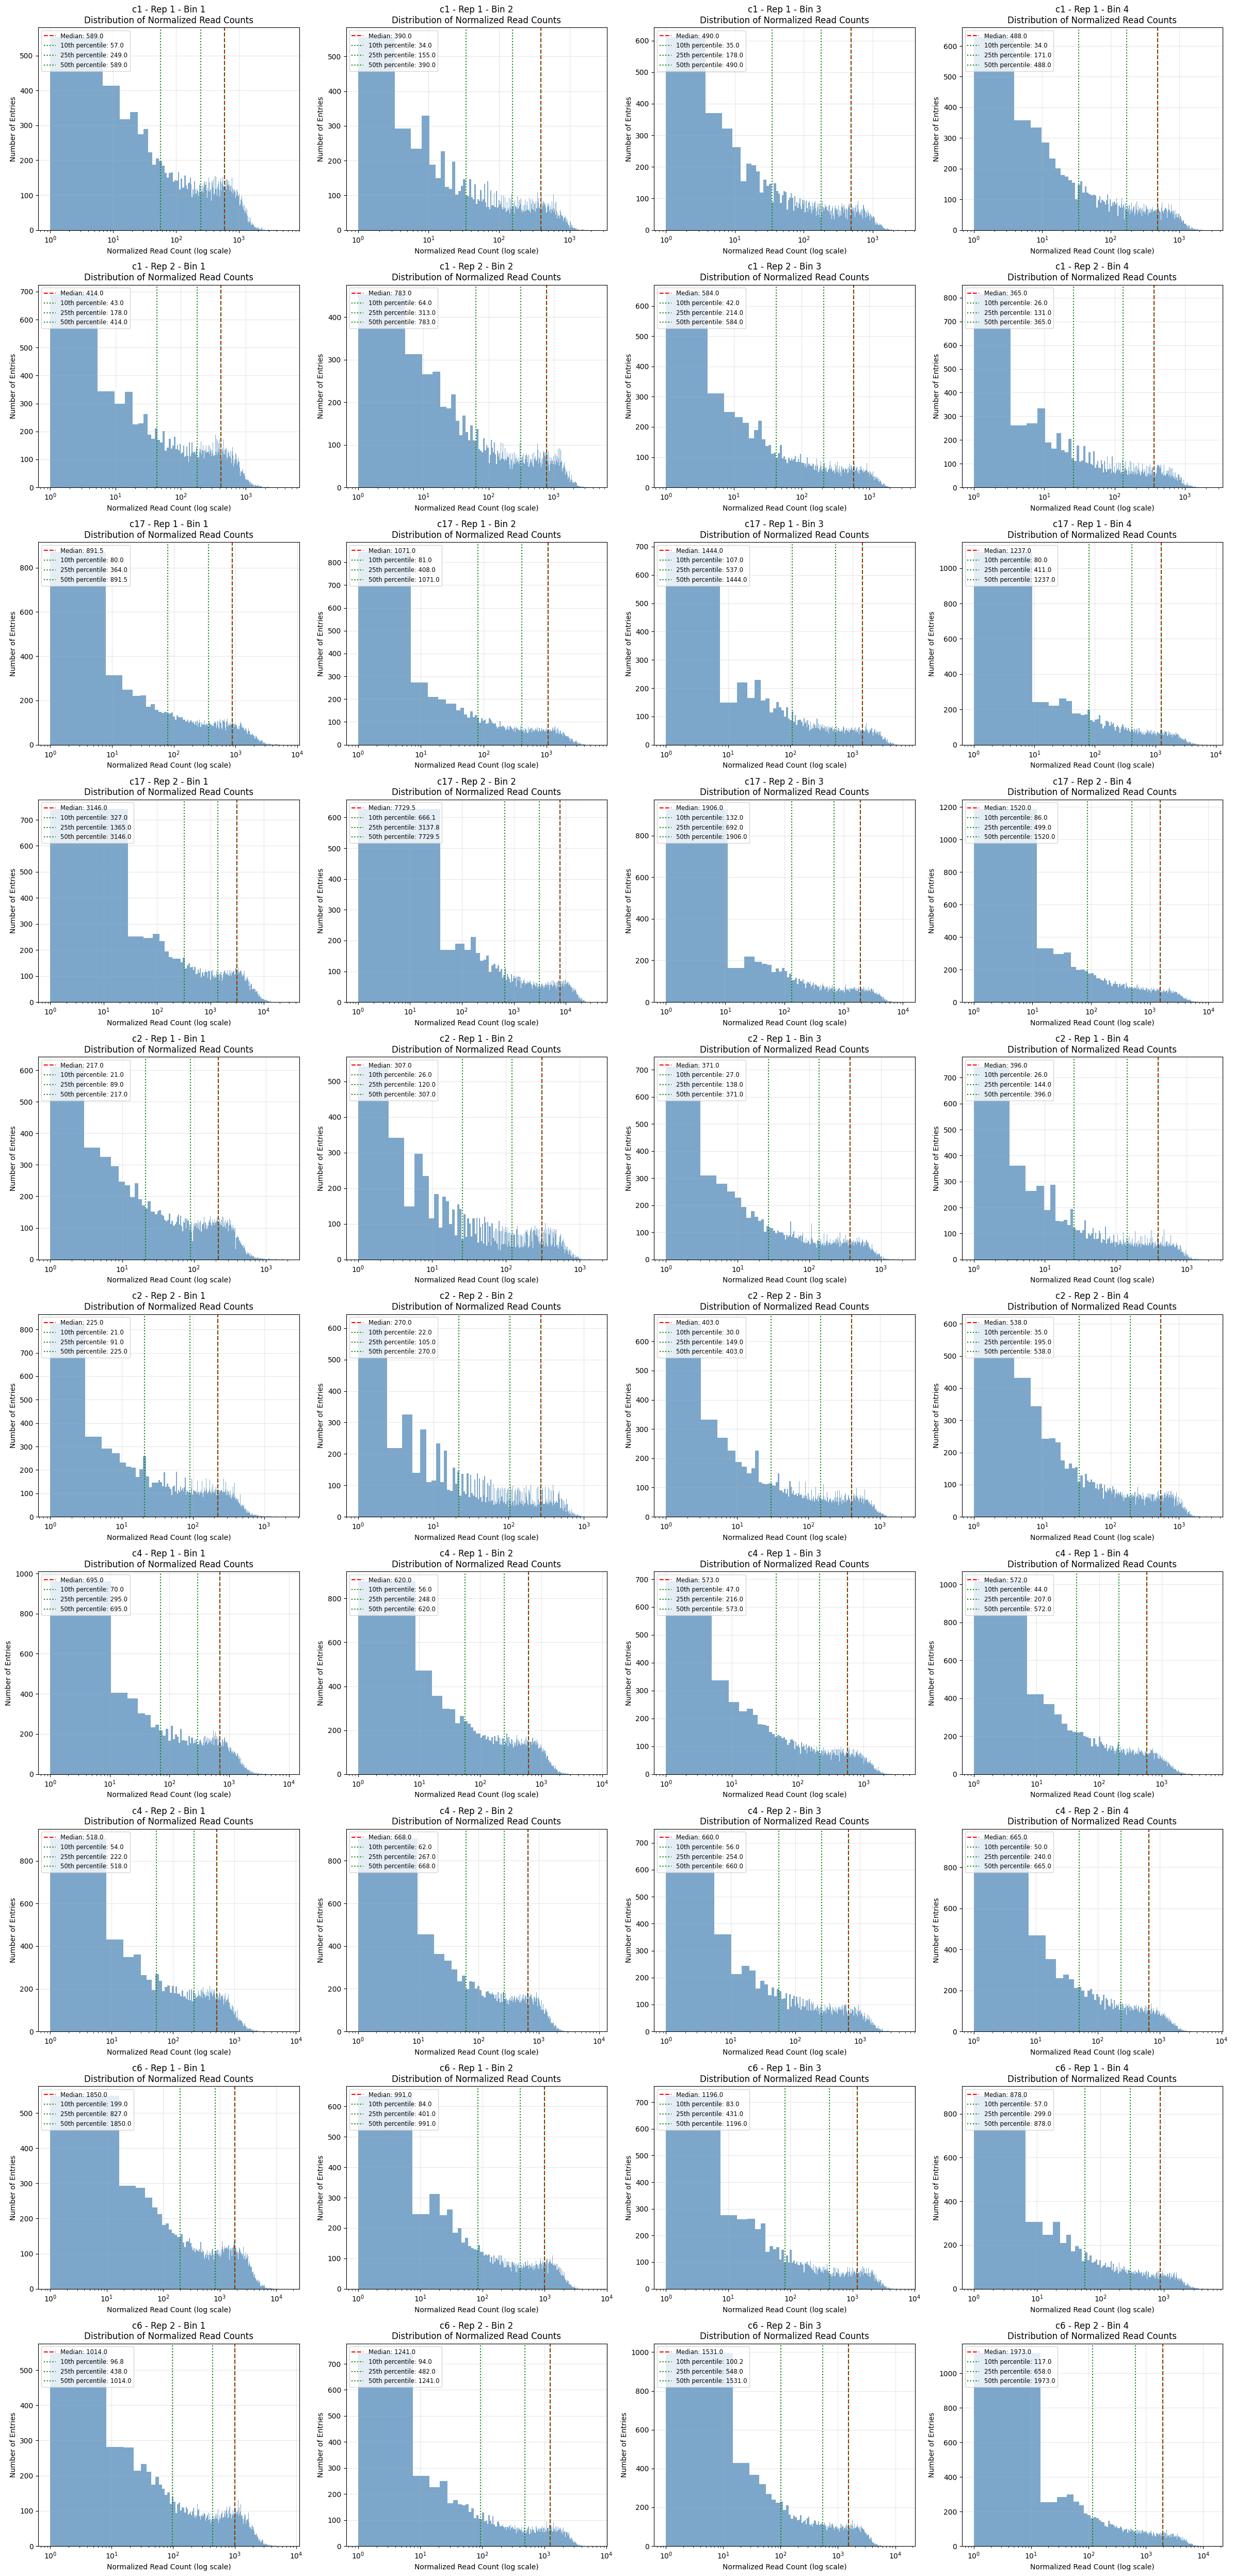

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.ticker import LogFormatter

# 计算有多少个unique的(cell_type, replicate, bin)组合来确定图表布局
cell_types = matt_data.columns.get_level_values('cell_type').unique()
replicates = matt_data.columns.get_level_values('replicate').unique()
bins = matt_data.columns.get_level_values('bin').unique()

# 计算需要多少行和列来展示所有图表
total_plots = len(cell_types) * len(replicates) * len(bins)
cols = min(4, total_plots)  # 每行最多4个图
rows = math.ceil(total_plots / cols)

# 创建足够大的图表
plt.figure(figsize=(cols * 6, rows * 5))

plot_index = 1
for cell_type in cell_types:
    for replicate in replicates:
        for bin_id in bins:
            try:
                # 检查该组合是否存在于数据中
                if (cell_type, replicate, bin_id) not in matt_data.columns:
                    continue
                
                # 获取数据
                data = matt_data[(cell_type, replicate, bin_id)].values
                
                # 过滤掉零值和NaN（对于对数刻度）
                data_filtered = data[data > 0]
                if len(data_filtered) == 0:
                    print(f"跳过 {cell_type}, {replicate}, {bin_id} - 没有大于0的值")
                    continue
                
                # 创建子图
                plt.subplot(rows, cols, plot_index)
                
                # 计算统计信息
                median = np.median(data_filtered)
                p10 = np.percentile(data_filtered, 10)
                p25 = np.percentile(data_filtered, 25)
                p50 = np.percentile(data_filtered, 50)
                
                # 绘制对数刻度的直方图
                plt.hist(data_filtered, bins=1000, alpha=0.7, color='steelblue')
                plt.xscale('log')
                
                # 添加参考线
                plt.axvline(x=median, color='red', linestyle='--', label=f'Median: {median:.1f}')
                plt.axvline(x=p10, color='green', linestyle=':', label=f'10th percentile: {p10:.1f}')
                plt.axvline(x=p25, color='green', linestyle=':', label=f'25th percentile: {p25:.1f}')
                plt.axvline(x=p50, color='green', linestyle=':', label=f'50th percentile: {p50:.1f}')
                
                # 设置标题和标签
                plt.title(f'{cell_type} - Rep {replicate} - Bin {bin_id}\nDistribution of Normalized Read Counts')
                plt.xlabel('Normalized Read Count (log scale)')
                plt.ylabel('Number of Entries')
                plt.legend(fontsize='small')
                plt.grid(True, alpha=0.3)
                
                plot_index += 1
            except Exception as e:
                print(f"处理 {cell_type}, {replicate}, {bin_id} 时出错: {e}")
                plot_index += 1
                continue

plt.tight_layout()
plt.show()

In [4]:
fit_results = list()
for col_id in tqdm(list(matt_data)):
    cell_type_id, replicate_id, bin_id = col_id
    result = {"cell_type": cell_type_id,
              "replicate": replicate_id,
              "bin": bin_id}
    lib = matt_data[col_id].values
    idata = fit_bayesian_model_5utr(lib)

    fit_params = {
        "wd1": idata["wd"][0].item(),
        "wd2": idata["wd"][1].item(),
        "psi": idata["psi"].item(),
        "p1": idata["p1"].item(),
        "n1": idata["n1"].item(),
        "p2": idata["p2"].item(),
        "n2": idata["n2"].item(),
    }
    result |= fit_params
    fit_results.append(result)
    
fits = pd.DataFrame(fit_results)
fits.to_csv("./Matt_5UTR_data/fit_results_utr5_singledist.csv", index=False)

  0%|                                                                                                                | 0/40 [00:00<?, ?it/s]

Output()

  2%|██▌                                                                                                     | 1/40 [00:10<06:41, 10.29s/it]

Output()

  5%|█████▏                                                                                                  | 2/40 [00:16<04:50,  7.65s/it]

Output()

  8%|███████▊                                                                                                | 3/40 [00:21<04:02,  6.56s/it]

Output()

 10%|██████████▍                                                                                             | 4/40 [00:26<03:36,  6.01s/it]

Output()

 12%|█████████████                                                                                           | 5/40 [00:31<03:22,  5.79s/it]

Output()

 15%|███████████████▌                                                                                        | 6/40 [00:37<03:14,  5.72s/it]

Output()

 18%|██████████████████▏                                                                                     | 7/40 [00:43<03:08,  5.73s/it]

Output()

 20%|████████████████████▊                                                                                   | 8/40 [00:48<03:01,  5.68s/it]

Output()

 22%|███████████████████████▍                                                                                | 9/40 [00:54<02:56,  5.68s/it]

Output()

 25%|█████████████████████████▊                                                                             | 10/40 [01:00<02:51,  5.73s/it]

Output()

 28%|████████████████████████████▎                                                                          | 11/40 [01:06<02:49,  5.86s/it]

Output()

 30%|██████████████████████████████▉                                                                        | 12/40 [01:12<02:43,  5.85s/it]

Output()

 32%|█████████████████████████████████▍                                                                     | 13/40 [01:18<02:41,  5.97s/it]

Output()

 35%|████████████████████████████████████                                                                   | 14/40 [01:24<02:37,  6.05s/it]

Output()

 38%|██████████████████████████████████████▋                                                                | 15/40 [01:30<02:29,  5.99s/it]

Output()

 40%|█████████████████████████████████████████▏                                                             | 16/40 [01:36<02:24,  6.03s/it]

Output()

 42%|███████████████████████████████████████████▊                                                           | 17/40 [01:42<02:15,  5.89s/it]

Output()

 45%|██████████████████████████████████████████████▎                                                        | 18/40 [01:48<02:08,  5.86s/it]

Output()

 48%|████████████████████████████████████████████████▉                                                      | 19/40 [01:54<02:03,  5.87s/it]

Output()

 50%|███████████████████████████████████████████████████▌                                                   | 20/40 [01:59<01:56,  5.81s/it]

Output()

 52%|██████████████████████████████████████████████████████                                                 | 21/40 [02:05<01:51,  5.87s/it]

Output()

 55%|████████████████████████████████████████████████████████▋                                              | 22/40 [02:11<01:43,  5.77s/it]

Output()

 57%|███████████████████████████████████████████████████████████▏                                           | 23/40 [02:16<01:35,  5.60s/it]

Output()

 60%|█████████████████████████████████████████████████████████████▊                                         | 24/40 [02:21<01:27,  5.46s/it]

Output()

 62%|████████████████████████████████████████████████████████████████▍                                      | 25/40 [02:27<01:24,  5.62s/it]

Output()

 65%|██████████████████████████████████████████████████████████████████▉                                    | 26/40 [02:33<01:18,  5.60s/it]

Output()

 68%|█████████████████████████████████████████████████████████████████████▌                                 | 27/40 [02:38<01:12,  5.59s/it]

Output()

 70%|████████████████████████████████████████████████████████████████████████                               | 28/40 [02:44<01:08,  5.74s/it]

Output()

 72%|██████████████████████████████████████████████████████████████████████████▋                            | 29/40 [02:50<01:03,  5.82s/it]

Output()

 75%|█████████████████████████████████████████████████████████████████████████████▎                         | 30/40 [02:56<00:57,  5.72s/it]

Output()

 78%|███████████████████████████████████████████████████████████████████████████████▊                       | 31/40 [03:01<00:51,  5.67s/it]

Output()

 80%|██████████████████████████████████████████████████████████████████████████████████▍                    | 32/40 [03:07<00:45,  5.74s/it]

Output()

 82%|████████████████████████████████████████████████████████████████████████████████████▉                  | 33/40 [03:13<00:41,  5.88s/it]

Output()

 85%|███████████████████████████████████████████████████████████████████████████████████████▌               | 34/40 [03:19<00:35,  5.85s/it]

Output()

 88%|██████████████████████████████████████████████████████████████████████████████████████████▏            | 35/40 [03:25<00:29,  5.94s/it]

Output()

 90%|████████████████████████████████████████████████████████████████████████████████████████████▋          | 36/40 [03:31<00:24,  6.00s/it]

Output()

 92%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 37/40 [03:37<00:17,  5.94s/it]

Output()

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▊     | 38/40 [03:43<00:11,  5.82s/it]

Output()

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 39/40 [03:49<00:05,  5.95s/it]

Output()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [03:54<00:00,  5.87s/it]


In [ ]:
plt.figure(figsize=(20, 48))
for i, (col_id, fit_res) in enumerate(zip(list(matt_data), fit_results)):
    wd_est = np.asarray([fit_res["wd1"], fit_res["wd2"]])
    psi_est = fit_res["psi"]
    p1_est = fit_res["p1"]
    p2_est = fit_res["p2"]
    n1_est = fit_res["n1"]
    n2_est = fit_res["n2"]

    mixture_dist = pm.Mixture.dist(
        w=wd_est,
        comp_dists=[
            pm.ZeroInflatedNegativeBinomial.dist(psi=psi_est, p=p1_est, n=n1_est),
            pm.ZeroInflatedNegativeBinomial.dist(psi=psi_est, p=p2_est, n=n2_est),
        ]
    )

    lib = matt_data[col_id]
    xlim_empiric = lib.max()

    logcdf = pm.logcdf(mixture_dist, np.arange(0, xlim_empiric)).eval()
    cdf = np.exp(logcdf)
    pdf = np.concatenate([cdf[:1], cdf[1:] - cdf[:-1]])
    ylim_empiric = pdf[1:].max() * 1.25

    plt.subplot(12, 4, i + 1)
    plt.hist(lib, bins=1000, density=True, alpha=0.5, label="library")
    plt.plot(pdf, color="C3", label="zinb_zinb_mixture_fit")
    plt.legend(loc="upper right")
    plt.xlim(-xlim_empiric // 20, xlim_empiric)
    plt.ylim(0, ylim_empiric)
    plt.title(", ".join(col_id))
plt.savefig("./Matt_5UTR_data/fit_chart_utr5.pdf")
plt.show()

### Step 2: pymc_zinb_normalization_utr5_singleref.ipynb
Input:

fit_results_utr5.csv: Previously generated fitting parameters file containing mixture model parameters
UTR5_sequence_counts_05_23_23.tsv: Raw sequence count data
UTR5_filtered_normalized_05_23_23.tsv: List of filtered sequences
Process:

Reference Distribution Selection:

Identifies the most "typical" distribution (sample with mean closest to overall mean)
Uses fitted parameters from this sample as reference distribution parameters
Normalization Steps:

For each cell line and replicate group:
Calculates CDF (Cumulative Distribution Function) of raw data
Maps original data to new distribution using reference distribution's quantile function
Applies CPM (Counts Per Million) normalization
Data Splitting:

Filters sequences
Randomly splits data into training (80%), validation (10%), and test (10%) sets
Restructures data organization
Output:

UTR5_zinb_norm_singleref_2023-05-23.csv containing:
Normalized expression values
Sequence IDs, cell line, and replicate information
Train/validation/test set labels
Purpose: The main purpose of this script is to standardize sequence count data to make samples comparable across different conditions. By selecting a reference distribution and using probability transform methods for normalization, it eliminates technical variations between samples while preserving statistical properties. This is crucial for subsequent machine learning model training.

The code implements a sophisticated normalization approach using Zero-Inflated Negative Binomial mixture models as the underlying statistical framework, which is particularly suitable for RNA sequence count data that often contains excess zeros and overdispersion.

In [ ]:
ref_ct, ref_rep, ref_bin = matt_data.columns[np.abs(matt_data.mean(axis=0) - matt_data.mean(axis=None)).argmin()]
reference_fit_id = (ref_ct, ref_rep, ref_bin)
reference_fit_id

In [ ]:
reference_fit_params = fits.set_index(["cell_type", "replicate", "bin"]).loc[reference_fit_id].to_dict()
reference_fit_params

In [ ]:
reference_rv = get_reference_rv(**reference_fit_params)

In [ ]:
max_theoretical_value = matt_data.max(axis=None)
max_theoretical_value

In [ ]:
matt_data_normalized = matt_data.copy()

for (cell_type_id, replicate_id), fits_grp in fits.groupby(by=["cell_type", "replicate"]):
    for i, lib_fit in fits_grp.iterrows():
        # Fitting library
        lib_key = (lib_fit["cell_type"], str(lib_fit["replicate"]), str(lib_fit["bin"]))
        lib = matt_data[lib_key].values
        libmax = lib.max()
        lib_fit_params = lib_fit.iloc[3:].to_dict()

        # Calculating CDF
        lib_rv = get_reference_rv(**lib_fit_params)
        lib_logcdf = logcdf = pm.logcdf(lib_rv, np.arange(0, libmax + 1)).eval()
        lib_cdf = np.exp(lib_logcdf)
        lib_q = lib_cdf[lib]  # Since library starts at 0, cdf array is the inverse quantile function

        # Calculating quantiles
        reference_q_func = get_discrete_quantile_function(reference_rv, max_value=max_theoretical_value)
        lib_norm = reference_q_func(lib_q)

        # Normalizing CPMs
        # # Notice the pseudocount
        lib_norm_cpm = (lib_norm + 1) / lib_norm.sum() * 1_000_000
        matt_data_normalized[lib_key] = lib_norm_cpm

In [ ]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 1, 1)
sns.boxenplot(matt_data)
plt.xticks(rotation=90)
plt.title("Non-normalized data")

plt.subplot(2, 1, 2)
sns.boxenplot(matt_data_normalized)
plt.xticks(rotation=90)
plt.title("Normalized data")

plt.tight_layout()
plt.show()

### how to got filtered df?
Q: How to generate the filtered normalized file, such as "../data/raw/UTR5_filtered_normalized_05_23_23.tsv”
In https://github.com/a96123155/parade/blob/master/data_preprocessing/pymc_zinb_normalization_utr5_singleref.ipynb, filtering_df should be 21609 rows × 40 columns.

However, I tried to follow the section "Load the expression values” in https://github.com/goodarzilab/khorms/blob/master/tissue_tropism/RNA-FM-representations.ipynb to generate filtering_df, but failed to generate the same one. The shape is 29971 rows × 41 columns.

Matt's A:
I don't think 21.609 vs 29.971 rows will make a huge difference. I used the normalization method described in the methods section of the preprint (ZINB reference based). However, I really don't think it's that important for you to reproduce the exact way I did this; this data seems to have given me pretty similar results regardless of the normalization technique used. 

##### Matt's code in RNA-FM-representation.ipynb¶

In [ ]:
matt_data_norm_df = normalize_median_of_ratios(matt_data, do_print = True)
matt_data_norm_df = matt_data_norm_df.divide(matt_data_norm_df.mean(axis = 1), axis = 0)
UTR5_is_NA = matt_data_norm_df.isna().sum(axis = 1) == 0

matt_data_filtered = matt_data_norm_df[UTR5_is_NA].copy()
filtered_seqs = matt_data_filtered.index
matt_data_filtered

##### Matt's data

In [ ]:
filtering_df = pd.read_csv("/home/yanyichu/1_UTR_Cell_Type/parade/data/data_05_23_23/UTR5_filtered_normalized_05_23_23.tsv", sep="\t", index_col=0, header=[0, 1, 2])
filtered_seqs = filtering_df.index
filtering_df

In [ ]:
matt_data_filtered = matt_data_normalized.loc[filtered_seqs]
matt_data_filtered.index.name = "seq"
matt_data_filtered

In [ ]:
matt_data_filtered